# Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 1i99fFYPeT3B4QNk0853jtVW45FV8LkuW

Downloading...
From: https://drive.google.com/uc?id=1i99fFYPeT3B4QNk0853jtVW45FV8LkuW
To: /content/heart.csv
100% 11.3k/11.3k [00:00<00:00, 34.1MB/s]


In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Univariate, Bivariate analysis, Outlier detection

In [8]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [9]:
df.corr()['age'].sort_values()

thalach    -0.398522
target     -0.225439
slope      -0.168814
restecg    -0.116211
sex        -0.098447
cp         -0.068653
thal        0.068001
exang       0.096801
fbs         0.121308
oldpeak     0.210013
chol        0.213678
ca          0.276326
trestbps    0.279351
age         1.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

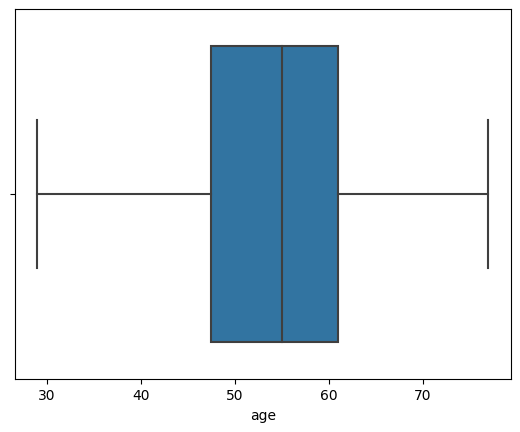

In [10]:
sns.boxplot(data=df,x='age')

* The values of age lie between 29 and 77 where 50% of the data is within the range 47 and 61
* The mean and median are very close so there are no outliers in this feature
* As per my Knowledge the risk of diabetis is higher in older people therefor this is a very important feature for us to build our model

In [11]:
df_cat = ['sex','cp','fbs','restecg','exang','slope','thal','target','ca']
df_num = ['age','trestbps','chol','thalach','oldpeak',]

In [12]:
def plot_disc(f):
  for i in df.columns:
    if i in df_cat:
      plt.figure()
      sns.boxplot(x=i,y=f,data=df)
      plt.plot()
    elif i in df_num:
      plt.figure()
      sns.scatterplot(x=f,y=i,data=df,hue='target')
      plt.plot()

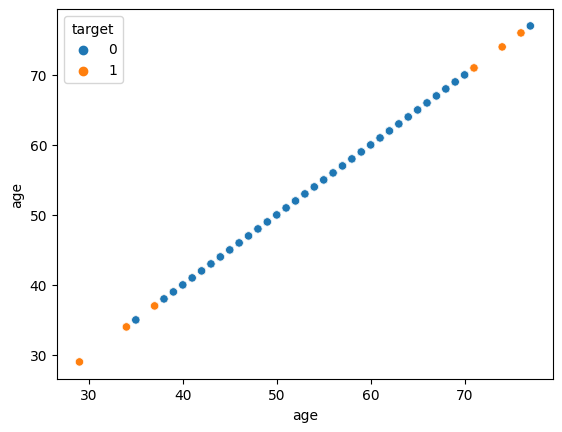

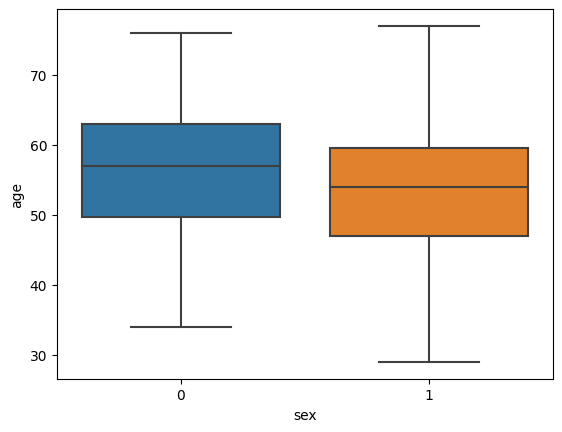

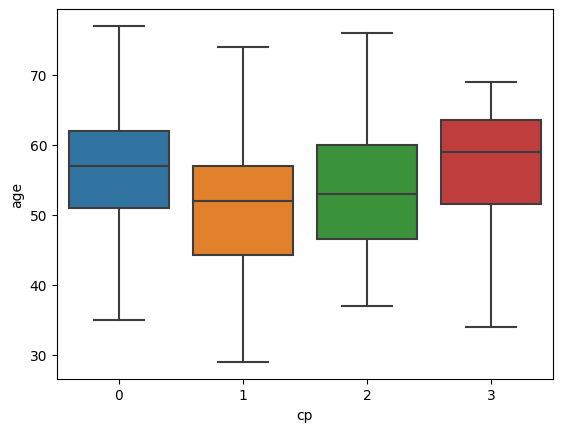

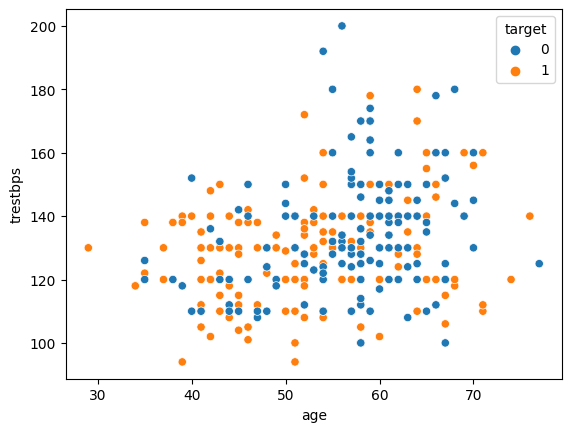

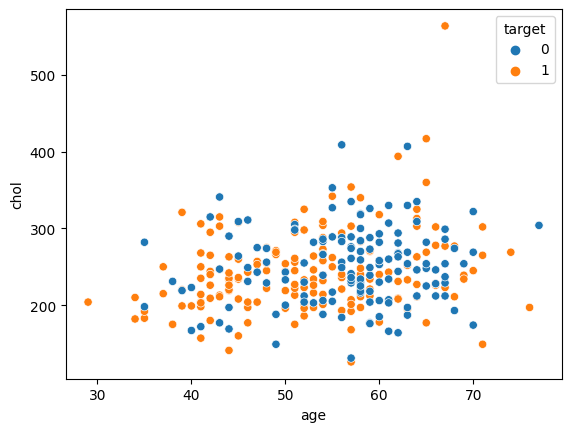

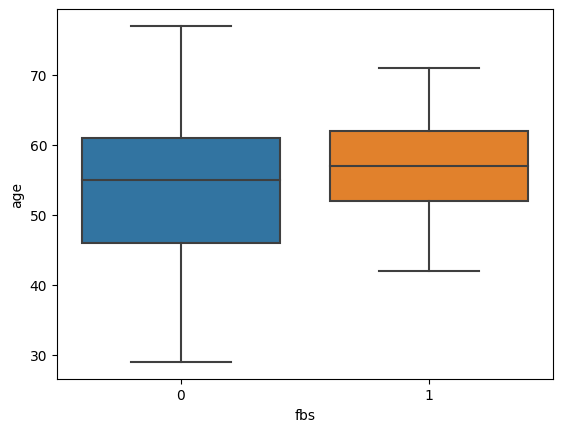

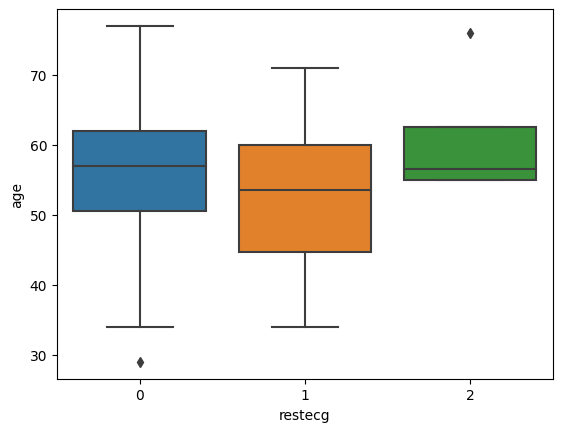

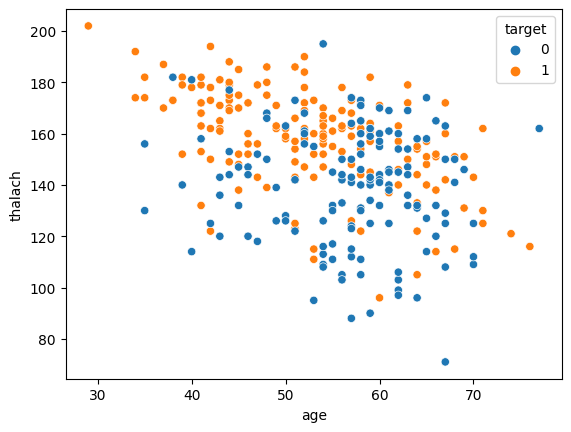

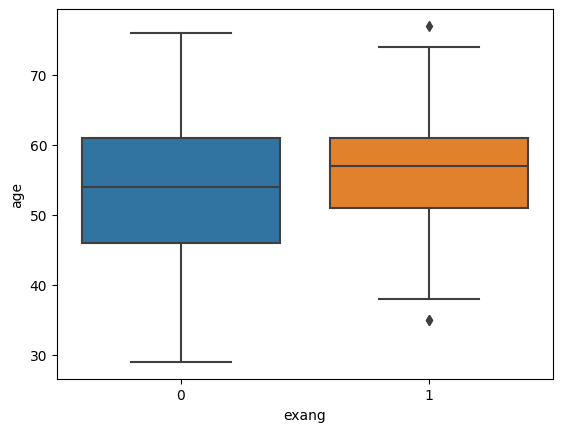

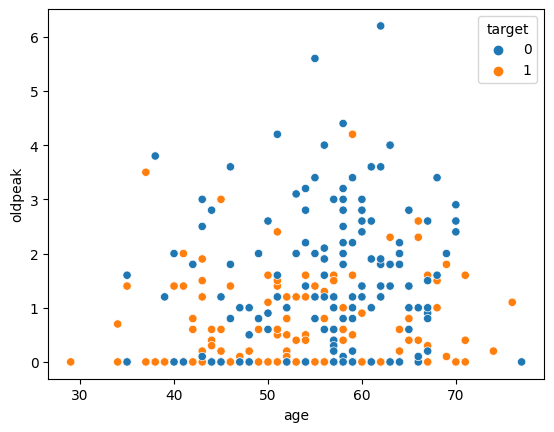

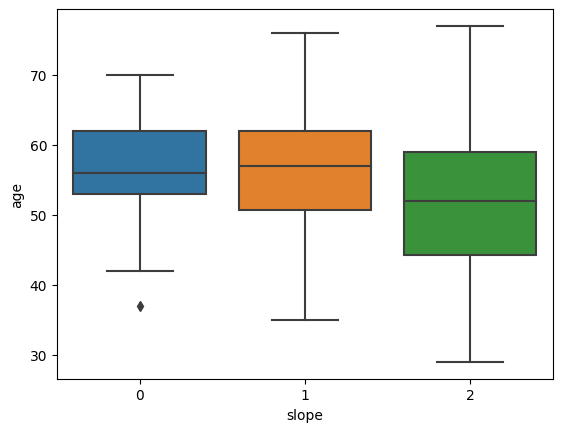

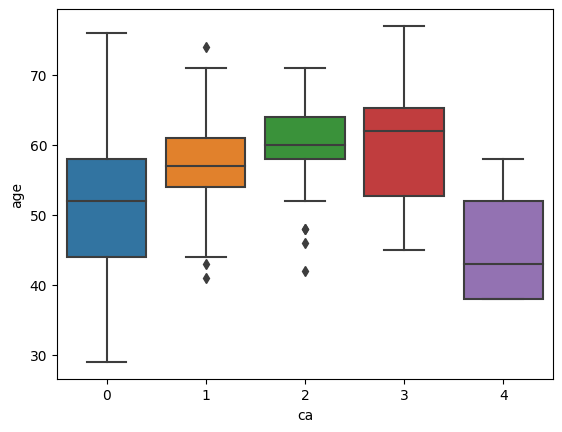

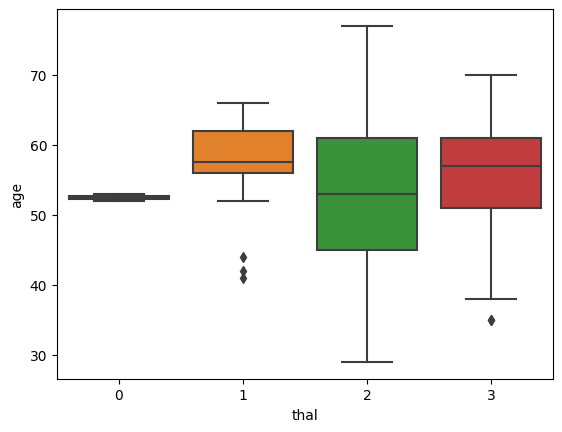

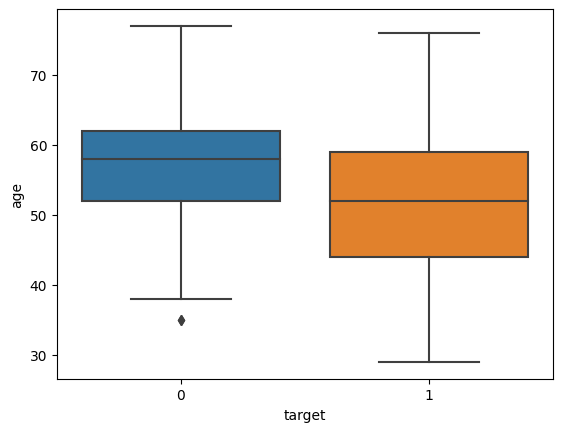

In [13]:
plot_disc('age')

-- age vs sex--
* people with sex 0 have higher ages compared to people with sex 1

-- age vs cp--
* It looks like age has some relationshop with cp, as we can see in the plot, for the age range of 50-60 cp type 3 is more and cp type 1 is less

-- age vs trestbps--
* It looks like people with trestbbs in the range(0-160) and age in range(0-55) have a high chance of getting diabetis
* we can see that people above the age of 55 have a chance of having high trestbps(>160)
* It looks like people in age(0-55) and trestbps(0-160) have a higher chance if getting diabetis compared to the rest

-- age vs chol--
* It looks like there are a lot of people with high cholestrol above the age of 40
* it looks like people in age(0-60) and cholestrol(0-300) have a high chance of getting diabetis compared to the rest
* there are a few outliers with high cholestrol after the age of 50
* i have decided to keep them because there is a good chance of a person being old and having high cholestrol

-- age vs fbs--
* It looks like people with fbs 1 are older compared to people with fbs 0

-- age vs restecg--
- We can see that people with restecg are younger than the rest

-- age vs thalach --
* It looks like thalach is decreasing as age is increasing
* it looks like people with thalach(140-200) have a high chance of getting diabetis

-- age vs exang --
* It looks like people with exand 1 are older compared to people with exang 0

-- age vs oldpeak--
* It looks like oldpeak increases slightly with age
* It looks like people with oldpeak value less than 2 have a higher chance of getting diabetis

-- age vs slope--
* It looks like people with slope 3 are slightly younger than the rest
* looks like ages of people with slope 1,2 are similar

-- age vs ca
* It looks like age plays an important role for ca

-- age vs thal
* It looks like people with thal 1 and 3 are older compared to people with thal 0 and 2

-- age vs target --
* it looks like people with diabetis are slightly older than people without diabetis
* But according to my knowledge it is my assumption that there is a good chance that people with diabetis die earlier than people without diabetis, that is why the data has an older population of people without diabetis
* further analysis would help with some more insights with this

<Axes: xlabel='sex', ylabel='count'>

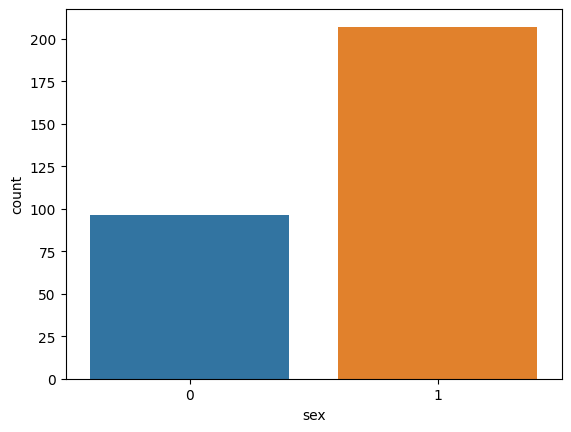

In [14]:
sns.countplot(data=df,x='sex')

* The data the more people with sex 1
* the data is not equally distributed among 2 sex's
* In the given information about the dataset it is not mentioned which label corresponds to which gender

In [15]:
# plot('sex')

def plot_cat(f):
  for i in df.columns:
    if i in df_cat:
      plt.figure()
      sns.countplot(x=f,data=df,hue=i)
      plt.plot()
    elif i in df_num:
      plt.figure()
      sns.boxplot(x=f,data=df,y=i)
      plt.plot()



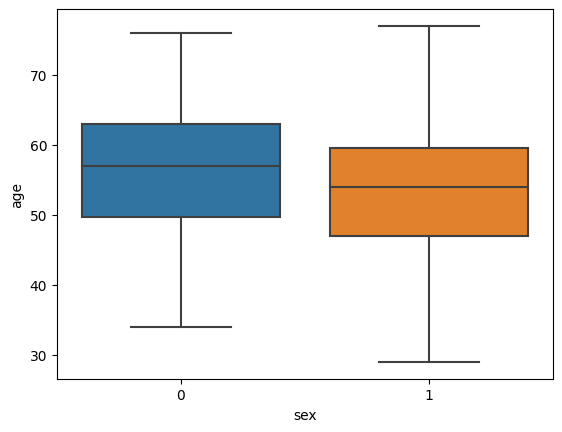

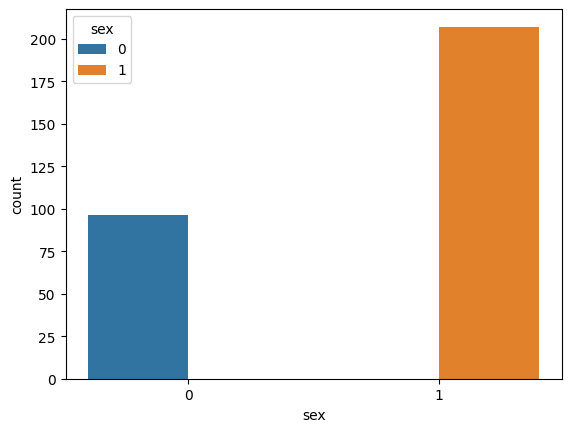

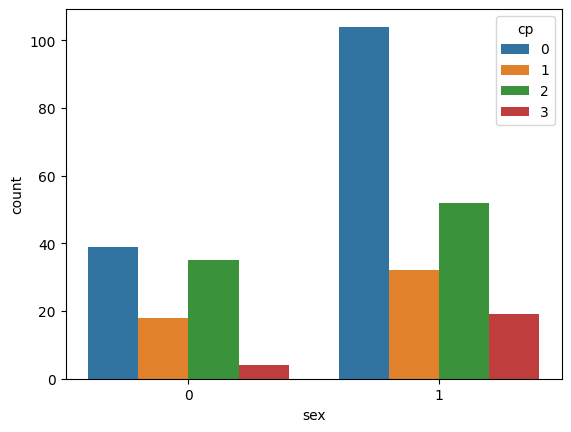

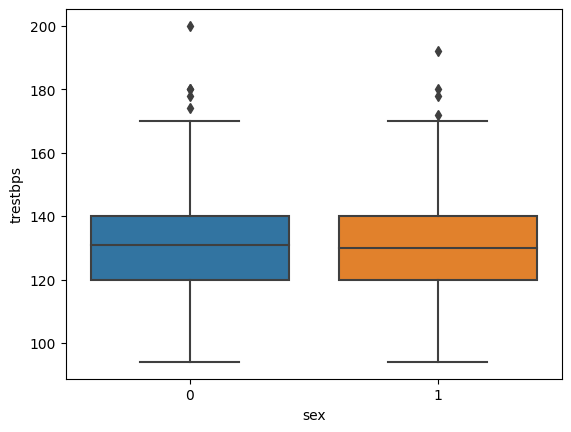

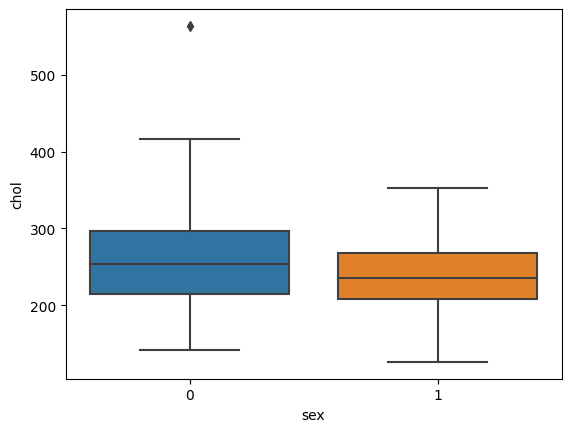

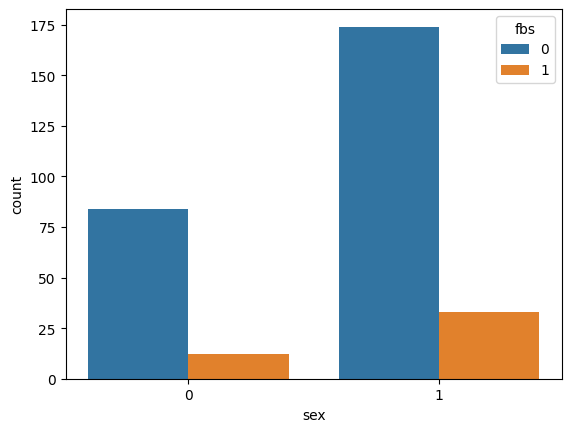

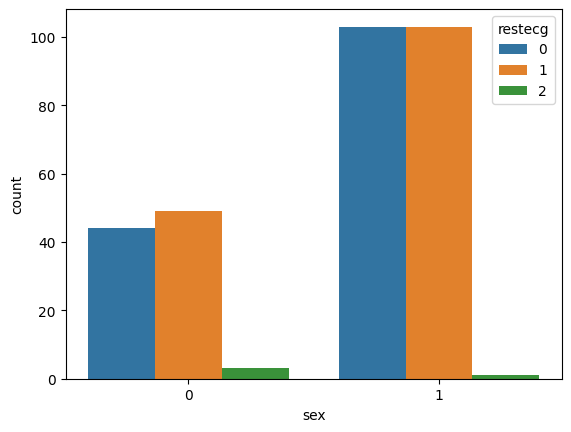

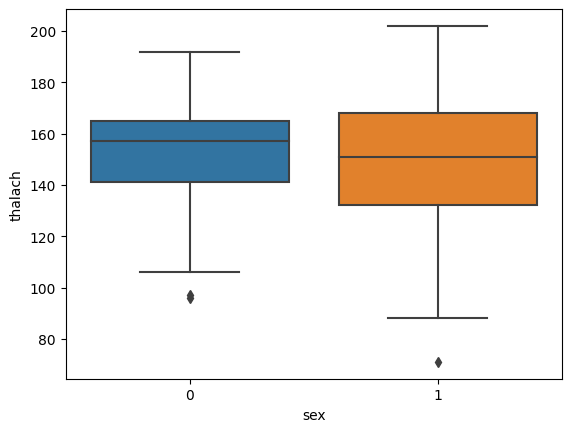

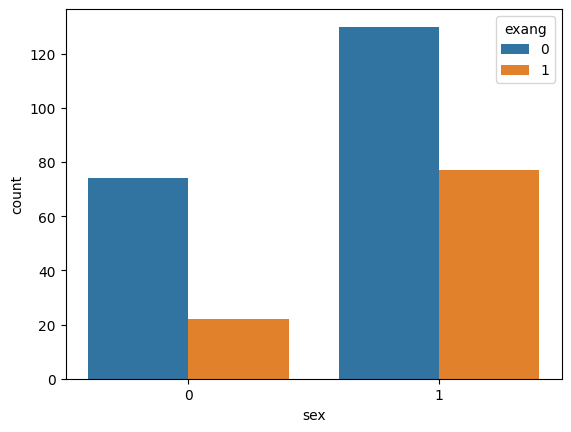

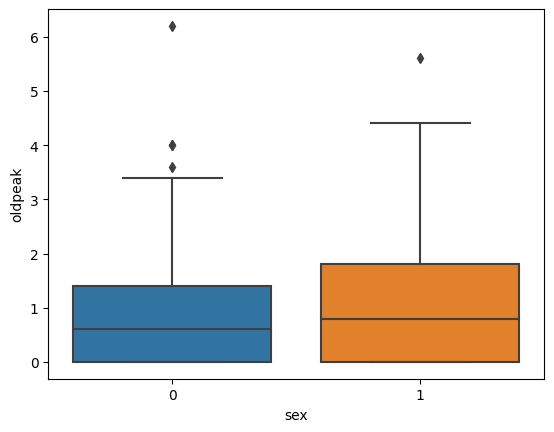

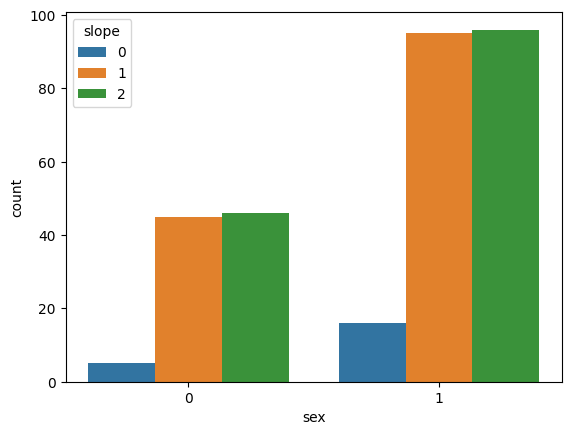

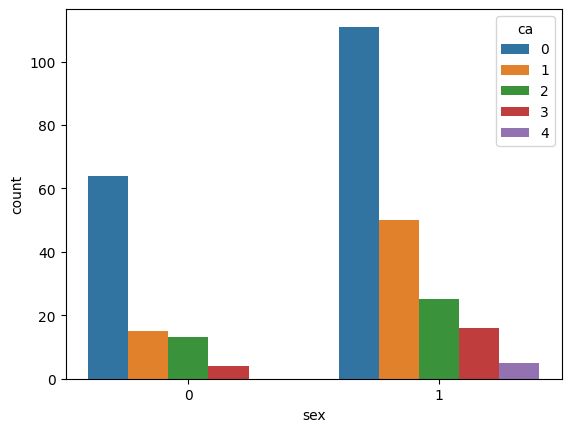

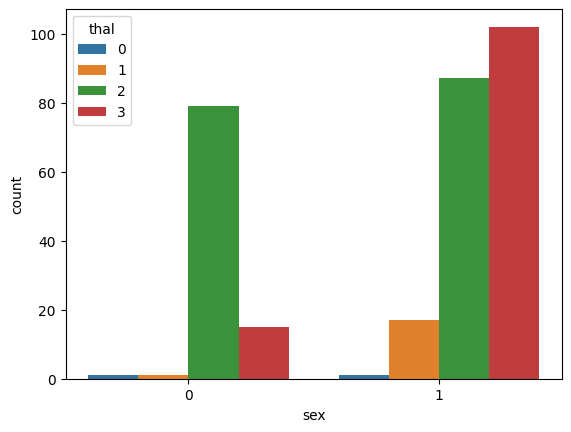

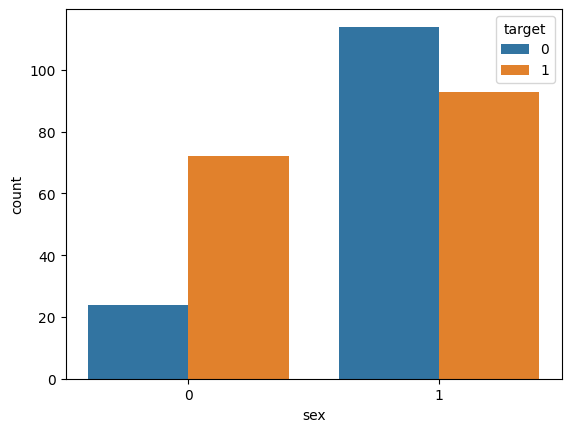

In [16]:
plot_cat('sex')

In [17]:
# sex vs trestbps
# H0 : trestbps for sex 0 = trestbps for sex 1
# Ha : trestbps for sex 0 > trestbps for sex 1
s0_trestbps = df[df['sex']==0]['trestbps']
s1_trestbps = df[df['sex']==1]['trestbps']

from scipy.stats import ttest_ind
s,p = ttest_ind(s0_trestbps,s1_trestbps,alternative='greater')

print(f'p = {p}')

if p<0.05:
  print('reject null hypothesis')
  print('correct hypothesis : trestbps for sex 0 > trestbps for sex 1')
else:
  print('failed to reject null hypothesis')
  print('correct hypothesis : trestbps for sex 0 = trestbps for sex 1')


p = 0.1623417398610521
failed to reject null hypothesis
correct hypothesis : trestbps for sex 0 = trestbps for sex 1


In [18]:
# sex vs thalach
# H0 : thalach for sex 0 = trestbps for sex 1
# Ha : thalach for sex 0 > trestbps for sex 1
s0_trestbps = df[df['sex']==0]['thalach']
s1_trestbps = df[df['sex']==1]['thalach']

from scipy.stats import ttest_ind
s,p = ttest_ind(s0_trestbps,s1_trestbps,alternative='greater')

print(f'p = {p}')

if p<0.05:
  print('reject null hypothesis')
  print('correct hypothesis : thalach for sex 0 > thalach for sex 1')
else:
  print('failed to reject null hypothesis')
  print('correct hypothesis : thalach for sex 0 = thalach for sex 1')


p = 0.22259665239931176
failed to reject null hypothesis
correct hypothesis : thalach for sex 0 = thalach for sex 1


In [19]:
# code source:https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626

# h0: sex and ca are independent
# ha: sex and ca are dependent

from scipy import stats
data_crosstab = pd.crosstab(df['sex'],
                            df['ca'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['sex'].unique()
columns = df['ca'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

chisquare-score is: 7.848392453751435  and p value is: 0.09729232542995336
Failed to reject the null hypothesis.


-- sex vs cp --
* It looks like cp is affected by sex
* we can see that sex 0 has higher percentage of cp type 1,2 compared to sex 1

-- sex vs trestbps --
* It looks like sex does not affect trestbps, after performing the hypothesis test we can confirm that sex does not affect trestbps

-- sex vs chol --
* it looks like people with sex 0 have high cholestrol levels

-- sex vs fbs --
* it looks like sex does not affect fbs

-- sex vs restecg --
* We can see that people with sex 1 have equal chance of getting restecg 1,2 whereas people with sex 0 have lower chance of getting restecg of 1 compared to 2
* People with sex 1 have lower chance of getting restecg 3

-- sex vs thalach
* at first glance it looks like people with sex 0 have higher thalach, after performing hypothesis test we can confirm that our observation was not true and sex doesnt affect thalach

-- sex vs exang --
* It looks like sex affects excersize induced angia(exang)
* we can see that people with sex 1 have a higher percentage of exang

-- sex vs oldpeak --
* it looks like people with sex 1 have higher oldpeak

-- sex vs slope --
* it looks like sex doesnt affect slope

-- sex vs ca --
* after performing hypothesis test we can conclude that sex and ca are dependent

-- sex vs thal --
* we can see that sex and thal are highly dependant
* people with sex 1 have a higher chance of having thal value 3 and 1 compare to people with sex 0

-- sex vs target --
* we can see that target is dependent on target
* people with sex 0 have a higher chance of getting diabetis


<Axes: xlabel='cp', ylabel='count'>

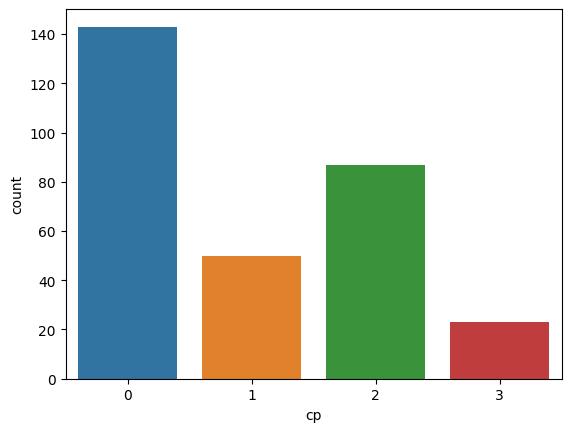

In [20]:
sns.countplot(data=df,x='cp')

* We can see that most people in the data have chest pain type 0 ,type 2 being the second most
* type 1 and 3 are the least amount of people

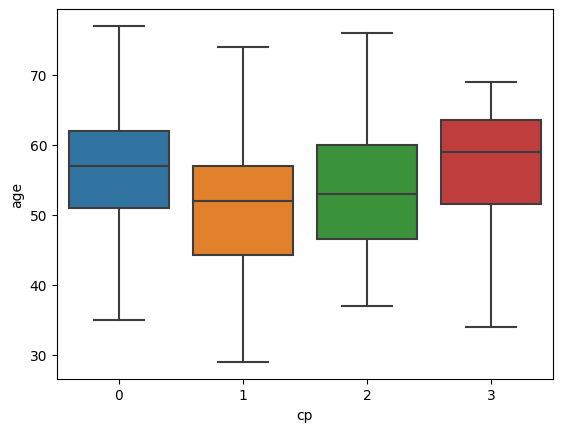

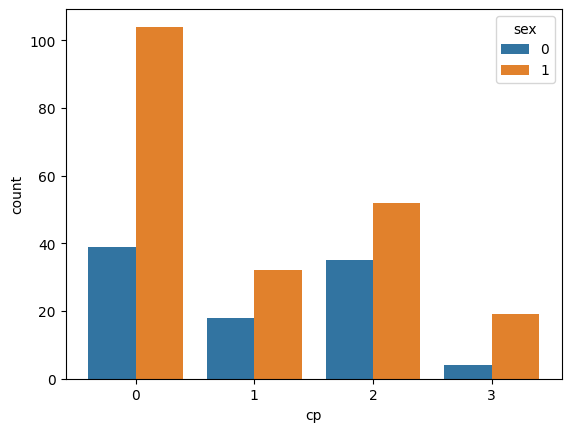

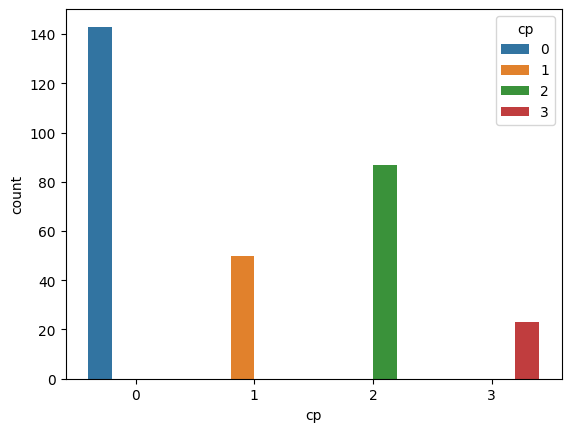

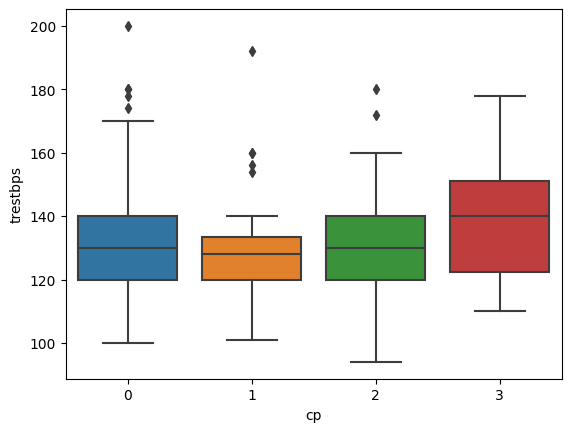

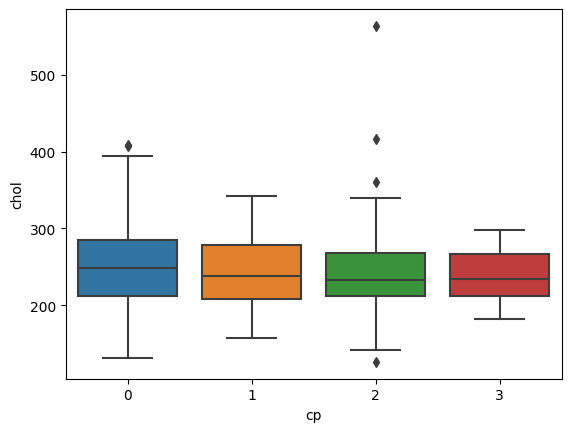

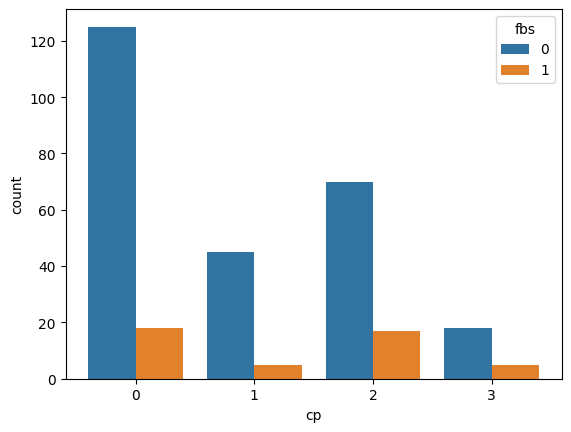

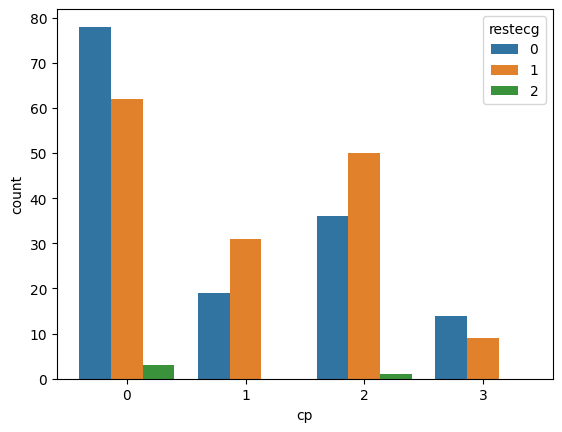

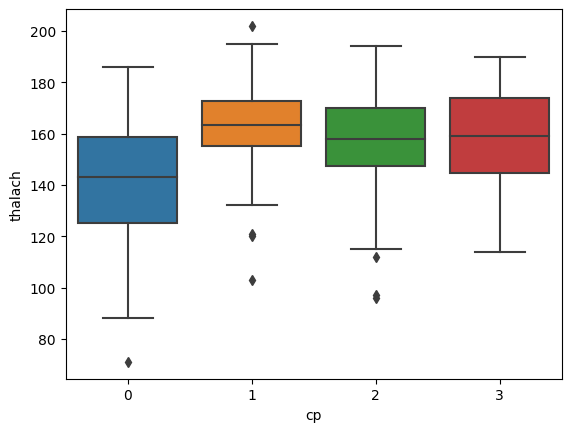

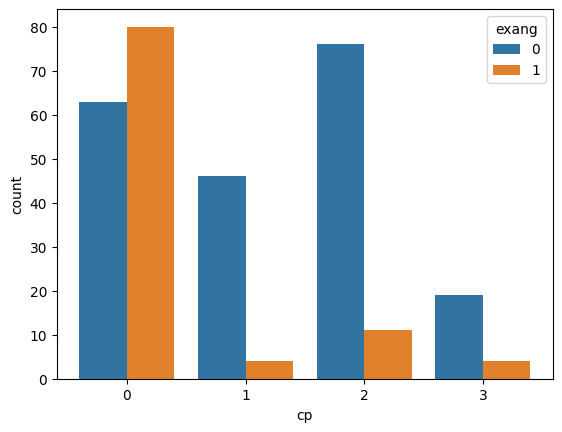

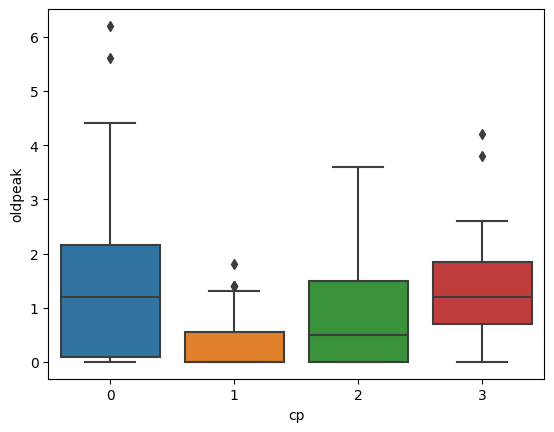

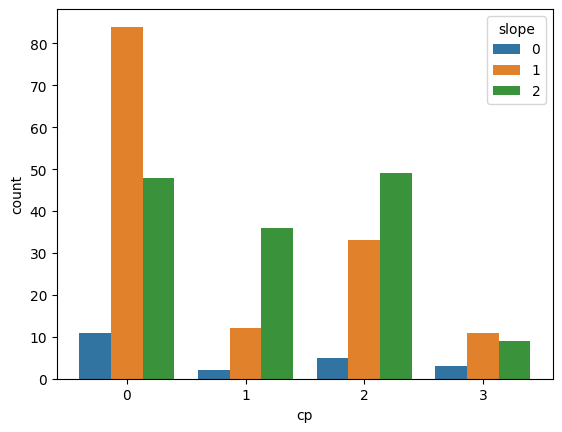

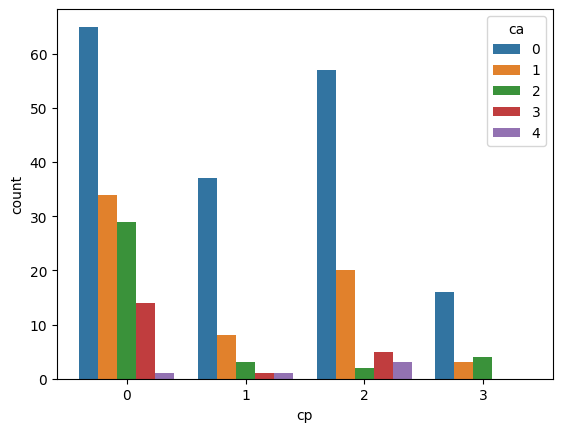

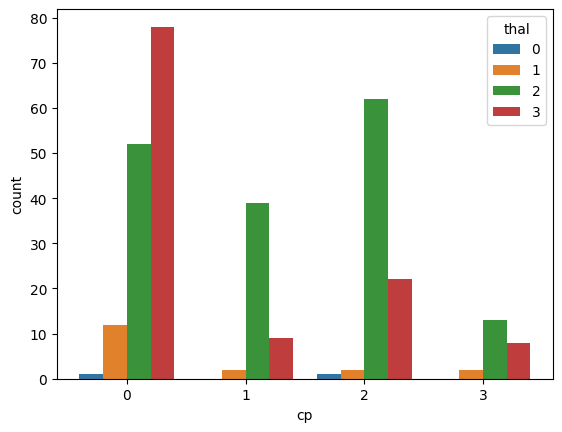

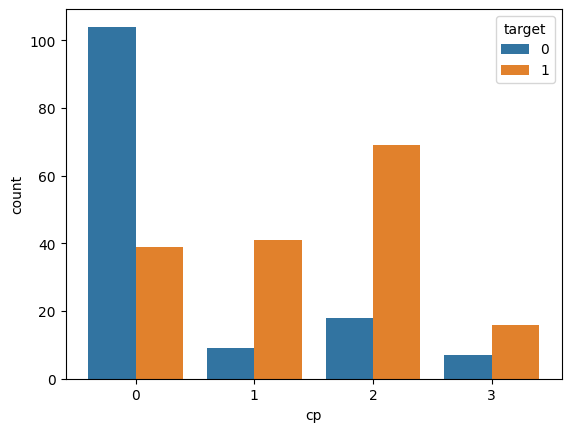

In [21]:
plot_cat('cp')

In [22]:
# cp vs fbs

# h0: both are independent
# ha: both are dependent

data_crosstab = pd.crosstab(df['cp'],
                            df['fbs'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['cp'].unique()
columns = df['fbs'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 3.8855652579738207  and p value is: 0.27408910086475413
Failed to reject the null hypothesis.


-- cp vs trestbps --
* We can see that people with chest pain(cp) type 3 have higher trestbps than others

-- cp vs chol --
* it looks like cholestrol doesnt affect cp type

-- cp vs fbs --
* after performing hypothesis test we can confirm cp and fbs are independent

-- cp vs thalach --
* we can see that people with cp-0 have lower thalach compared to rest

--cp vs restecg --
* We can clearly see a relation between cp ans restecg
* people with cp 0,3 have a higher chance of getting restecg 0 compared to the rest

-- cp vs exang --
* we can see that people with cp-0 have higher chance of getting exang compared to rest

-- cp vs oldpeak
* we can see that cp and oldpeak are highly dependant
* people with cp-1 have lower oldpeak compared to rest

-- cp vs slope --
* It looks like people with cp 0 and 3 have a higher chance of having slope 1
* people with slope 1,2 have a higher chance of getting slope 2

-- cp vs ca --
* we can see that ca and cp are dependent on each other

-- cp vs thal --
* We can see that people with cp 0 have higher chance of getting thal value 3
* People with cp 1,2,3 have high chance of having thal value 2

-- cp vs target --
* people with cp 1,2,3 have high cahnce of getting diabetis

<Axes: xlabel='trestbps'>

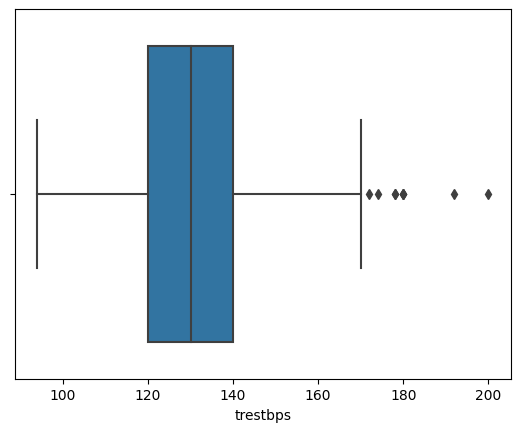

In [23]:
sns.boxplot(data=df,x='trestbps')

In [24]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

* Values for trestbps lie between 94 and 200
* there are a few outliers as we can see in the boxplot
* after further analysis i will decide if i will keep them or drop them

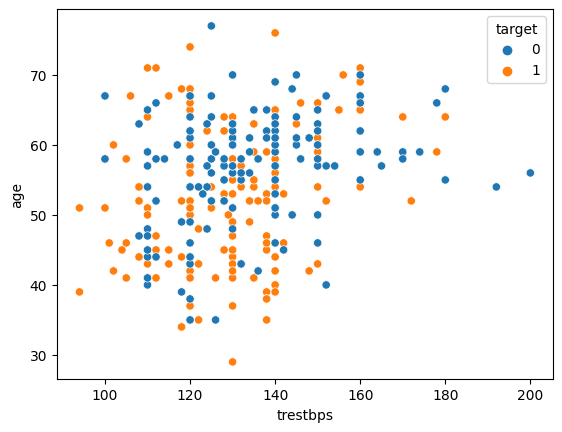

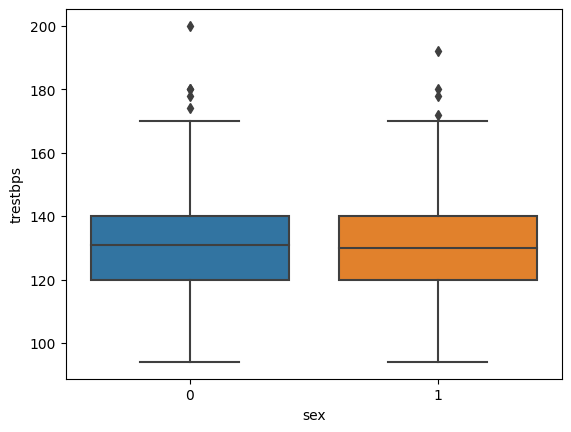

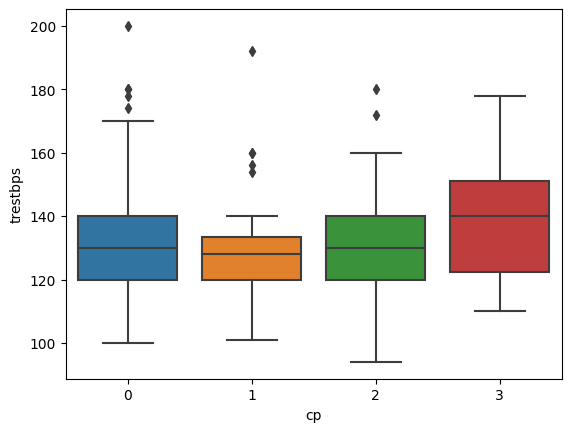

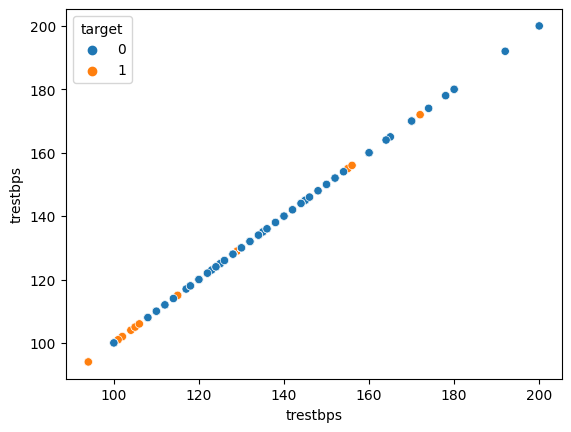

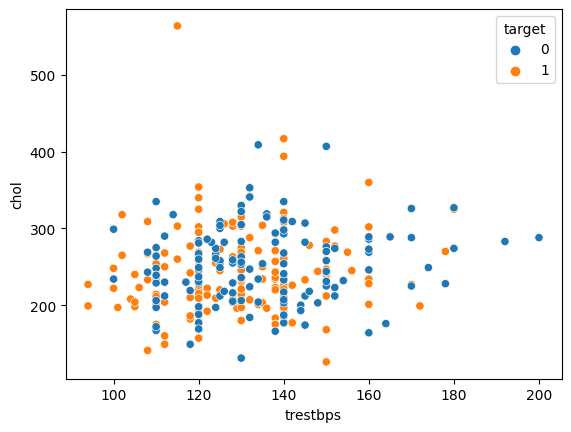

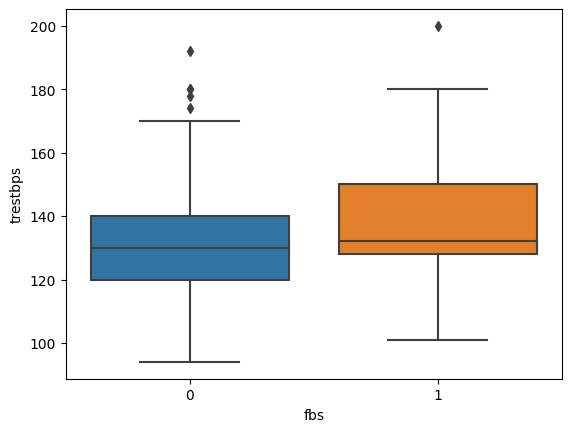

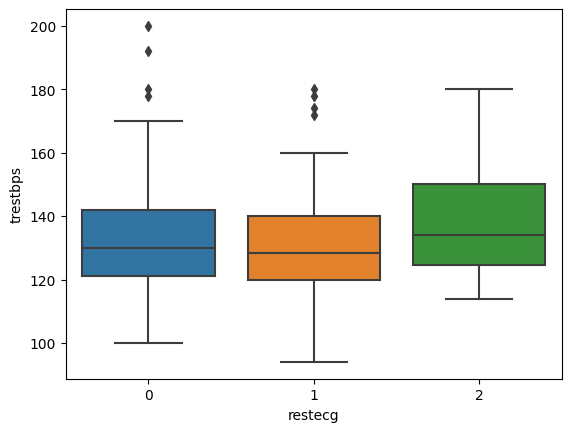

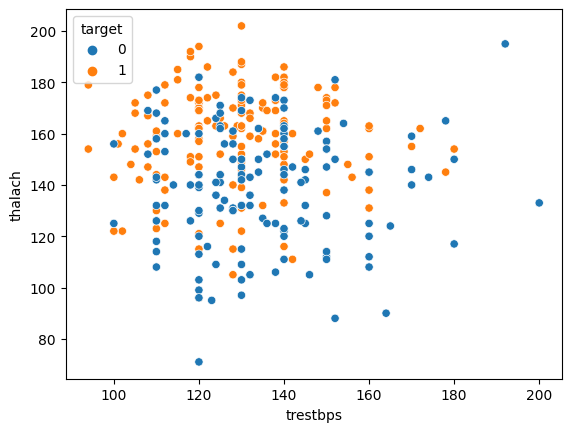

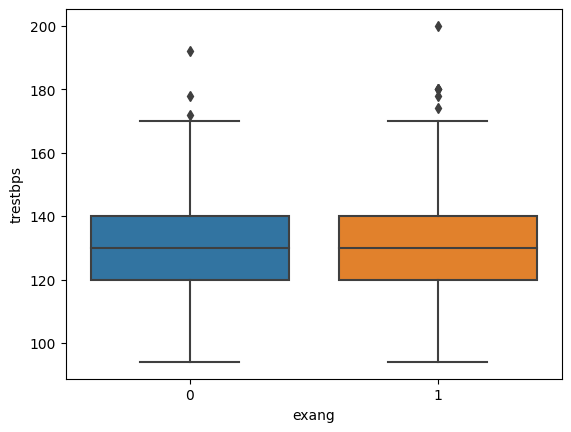

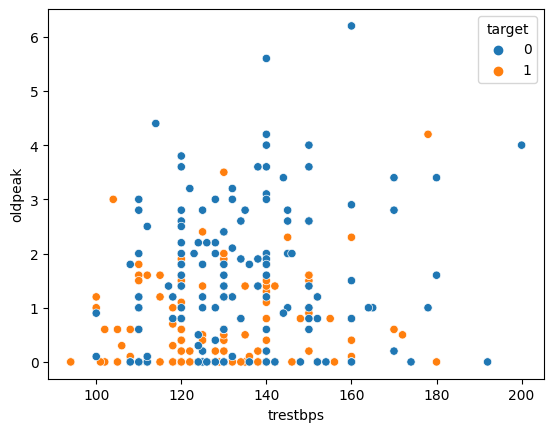

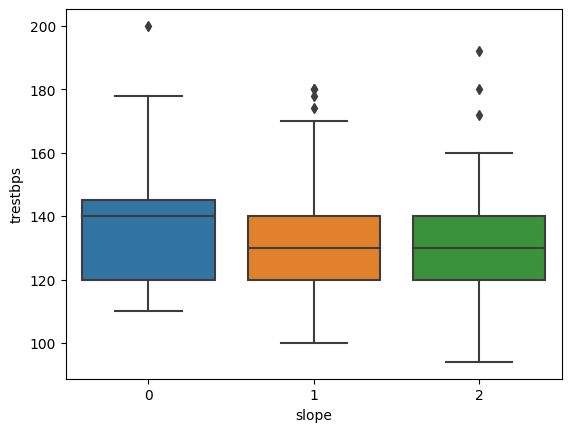

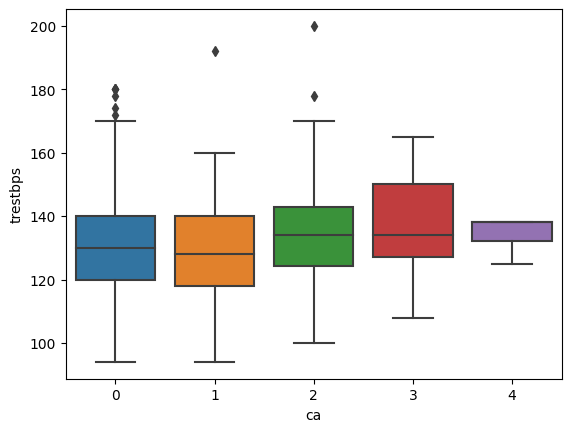

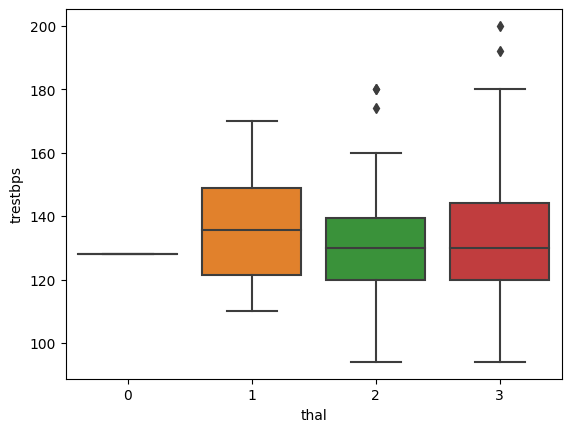

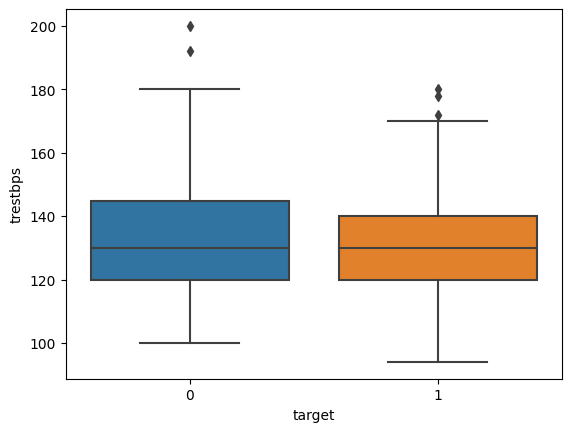

In [25]:
plot_disc('trestbps')

In [26]:
# trestbps vs fbs

from scipy.stats import ttest_ind
# h0: trestbps for fbs label 0 = trestbps for fbs label 1
# h0: trestbps for fbs label 0 < trestbps for fbs label 1

f0_trestbps = df[df['fbs']==0]['trestbps']
f1_trestbps = df[df['fbs']==1]['trestbps']

from scipy.stats import ttest_ind
s,p = ttest_ind(f0_trestbps,f1_trestbps,alternative='less')

print(f'p = {p}')

if p<0.05:
  print('reject null hypothesis')
  print('correct hypothesis : trestbps for fbs 0 < trestbps for fbs 1')
else:
  print('failed to reject null hypothesis')
  print('correct hypothesis : trestbps for fbs 0 = trestbps for fbs 1')



p = 0.0009605677008484807
reject null hypothesis
correct hypothesis : trestbps for fbs 0 < trestbps for fbs 1


In [27]:
# trestbps vs oldpeak
df.corr()['trestbps']['oldpeak']

0.19321647240953582

In [28]:
# trestbps vs ca

# H0: all 5 have same mean
# Ha: all 5 dont have same mean

from scipy.stats import f_oneway
a = df[df['ca']==0]['trestbps']
b = df[df['ca']==1]['trestbps']
c = df[df['ca']==2]['trestbps']
d = df[df['ca']==3]['trestbps']
e = df[df['ca']==3]['trestbps']

s,p = f_oneway(a, b, c,d,e)
print(f'p = {p}')
if p<0.05:
  print('reject null hypothesis')
else:
  print('failed to reject null hypothesis')



p = 0.14888168822462391
failed to reject null hypothesis


-- Trestbps va chol --
* looks like most people have chol <400 and trestbps <180
* From the plot it looks like people with trestbps <120 have a higher chance of getting diabetis but cant say it with certainity without further analysis

-- trestbps vs fbs --
* After performing a t test we can confirm that trestbps for fbs 0 is lower than trestbps for fbs 1

-- trestbps vs restegc --
* we can see that trestbps for restecg 2 is higher than others

-- trestbps vs thalach --
* it looks like trestbps and thalach dont follow any pattern
* we can see that people thalach above 140 and trestbps in range(100,160) have a higher chance of getting diabetis

-- trestbps vs exang --
* it looks like trestbpd doesnt affect the chance of getting or not getting exang

-- trestbps vs oldpeak --
* as we can see in the above plot and correlation value there is no relation between trestbps and oldpeak

-- trestbps vs slope --
* we can see that people with slope 1,2 have trestbps at around 130
* Whereas for poeople with slope 0 the value of trestbps is slightly higher i.e around 140

-- trestbps vs ca --
* At first glance it looks like there is some difference for trestbps values for different ca labels
* After hypothesis we can say with certainity that ca and trestbps are not related

-- trestbps vs thal --
* It looks like trestbps for thal 1 is slightly higher than others

-- trestbps vs target --
* It looks like trestbps doesnt affect the target by that much
* Therefore dropping this feature



In [29]:
# df = df.drop('trestbps',axis=1)
drop_col = ['trestbps']


<Axes: xlabel='chol'>

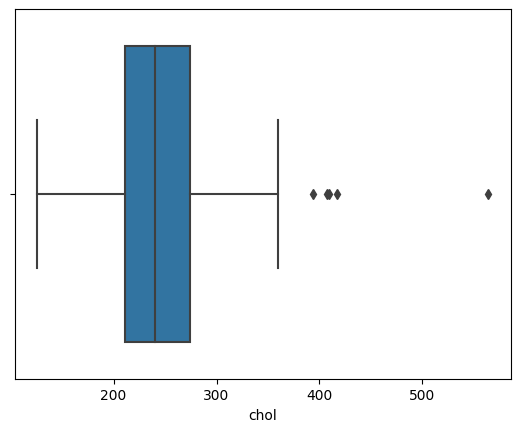

In [30]:
sns.boxplot(data=df,x='chol')

In [31]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

* As we can see there are few outliers
* values for chol are in range(126,564)

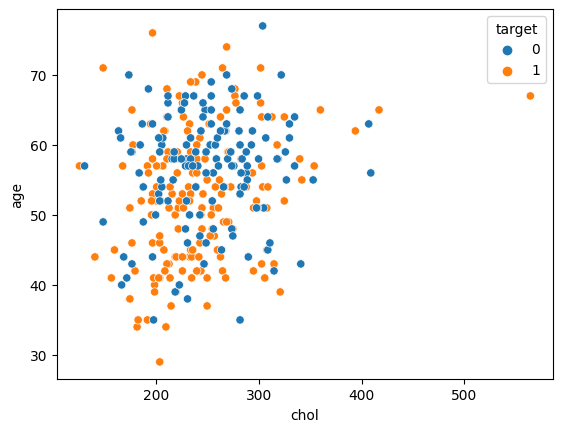

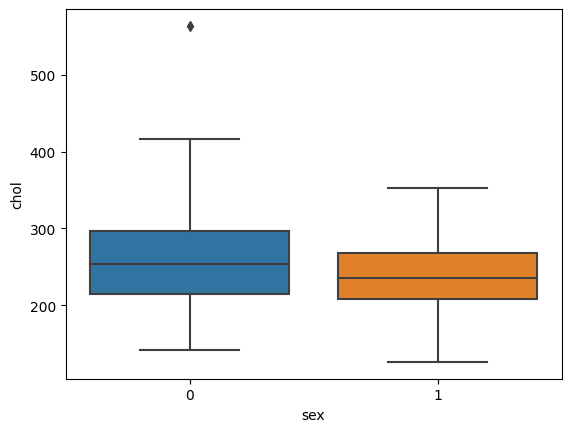

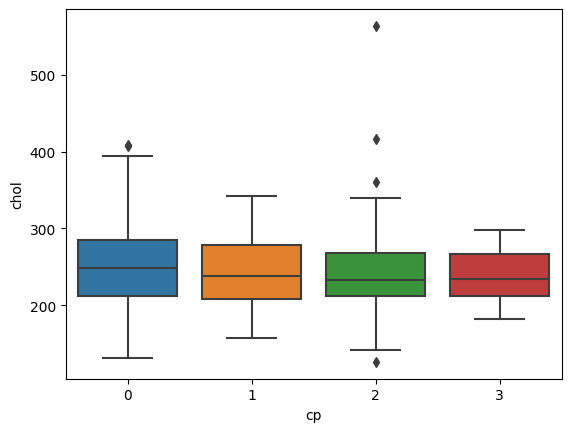

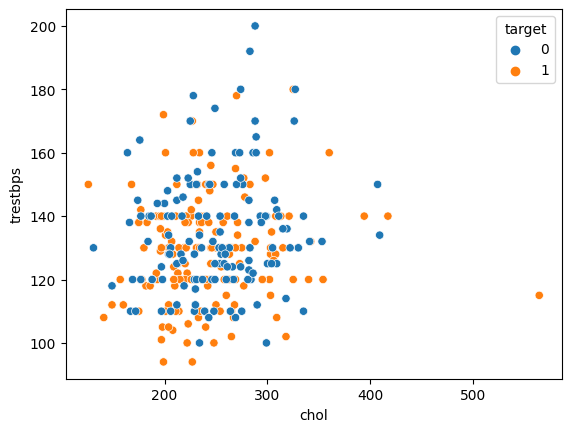

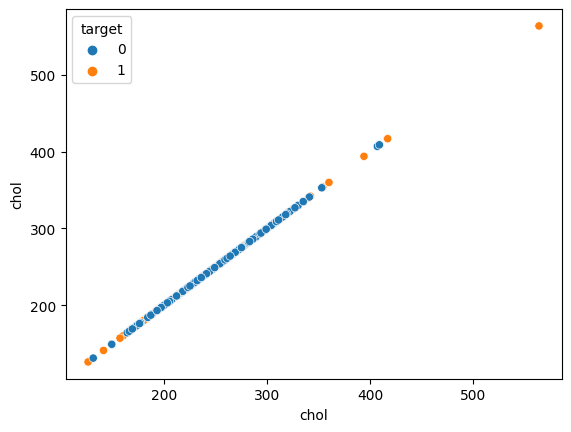

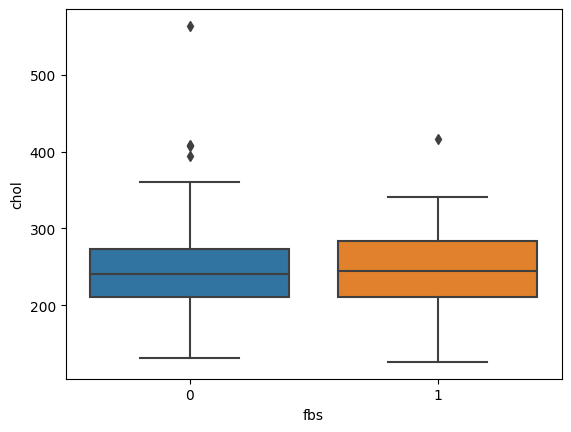

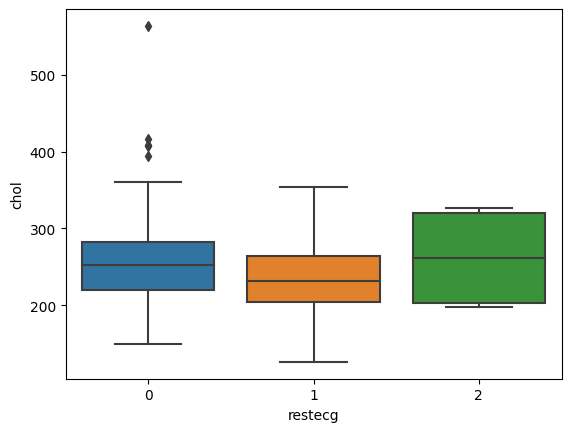

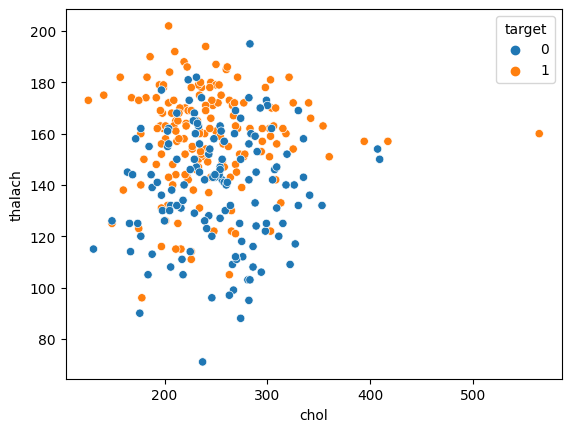

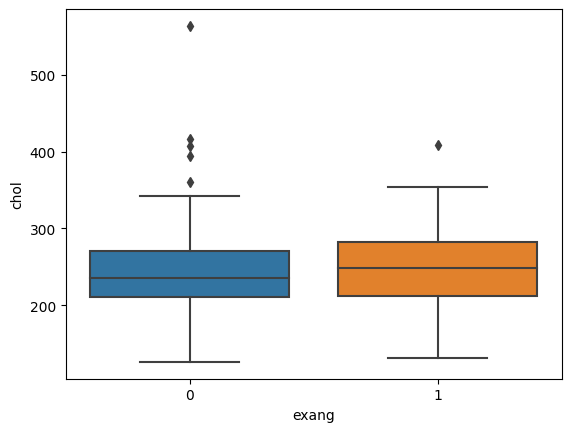

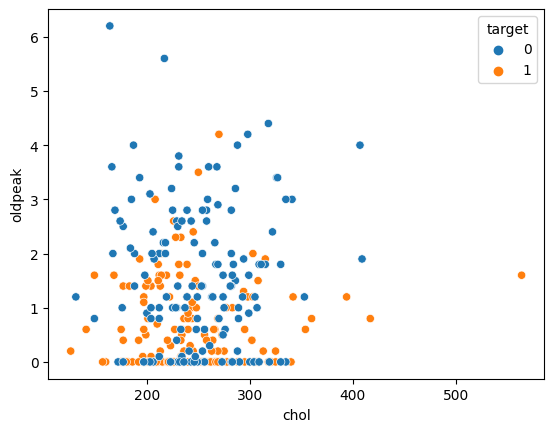

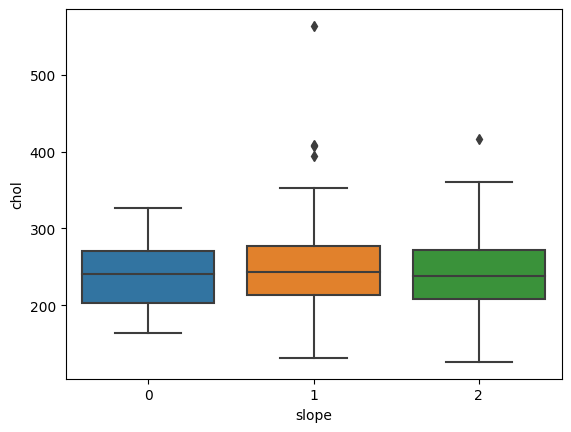

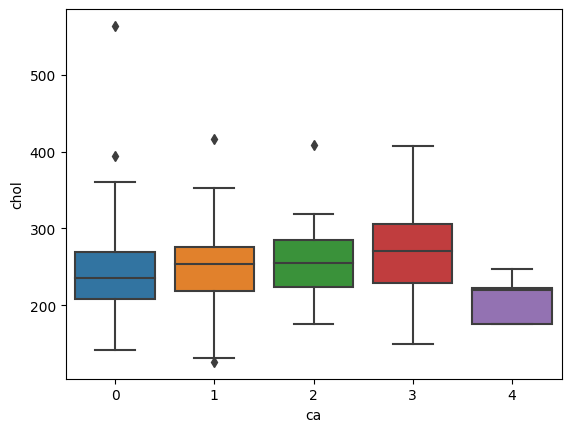

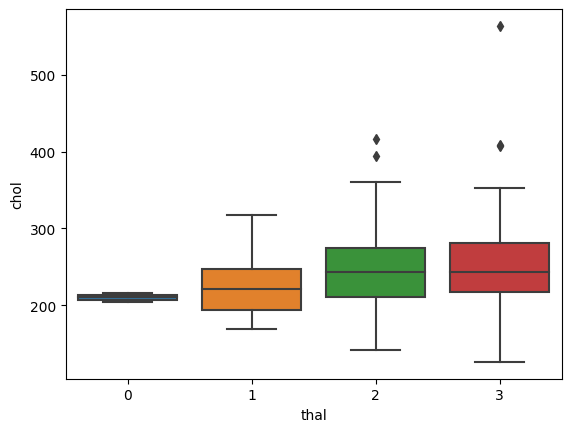

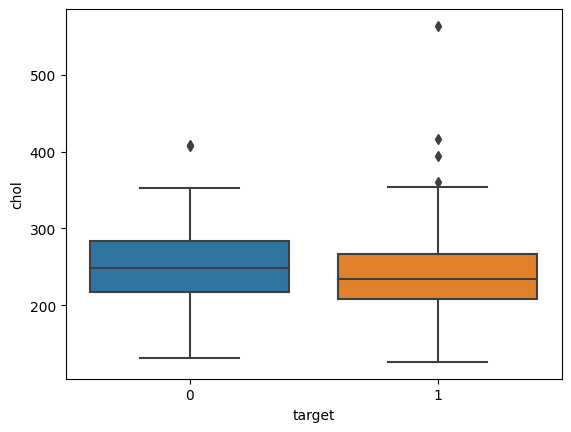

In [32]:
plot_disc('chol')

In [33]:
#  chol vs fbs

# h0: chol for fbs label 0 = chol for fbs label 1
# ha: chol for fbs label 0 != chol for fbs label 1
from scipy.stats import ttest_ind

a = df[df['fbs']==0]['chol']
b = df[df['fbs']==1]['chol']

from scipy.stats import ttest_ind
s,p = ttest_ind(a,b)

print(f'p = {p}')

if p<0.05:
  print('reject null hypothesis')
  print('correct hypothesis : chol for fbs 0 != chol for fbs 1')
else:
  print('failed to reject null hypothesis')
  print('correct hypothesis : chol for fbs 0 = chol for fbs 1')



p = 0.8177389372208479
failed to reject null hypothesis
correct hypothesis : chol for fbs 0 = chol for fbs 1


In [34]:
#  chol vs exang

# h0: chol for exang label 0 = chol for exang label 1
# ha: chol for exang label 0 < chol for exang label 1
from scipy.stats import ttest_ind

a = df[df['exang']==0]['chol']
b = df[df['exang']==1]['chol']

from scipy.stats import ttest_ind
s,p = ttest_ind(a,b,alternative='less')

print(f'p = {p}')

if p<0.05:
  print('reject null hypothesis')
  print('correct hypothesis : chol for fbs 0 < chol for fbs 1')
else:
  print('failed to reject null hypothesis')
  print('correct hypothesis : chol for fbs 0 = chol for fbs 1')



p = 0.1223853904395639
failed to reject null hypothesis
correct hypothesis : chol for fbs 0 = chol for fbs 1


In [35]:
#  chol vs slope

# H0: all four have same mean
# Ha: all four dont have same mean

from scipy.stats import f_oneway
a = df[df['slope']==0]['chol']
b = df[df['slope']==1]['chol']
c = df[df['slope']==2]['chol']

s,p = f_oneway(a, b, c)
print(f'p = {p}')
if p<0.05:
  print('reject null hypothesis')
else:
  print('failed to reject null hypothesis')

p = 0.570008929074459
failed to reject null hypothesis


In [36]:
#  chol vs target

# h0: chol for target label 0 = target for fbs label 1
# ha: chol for target label 0 < target for fbs label 1
from scipy.stats import ttest_ind

a = df[df['target']==0]['chol']
b = df[df['target']==1]['chol']

from scipy.stats import ttest_ind
s,p = ttest_ind(a,b,alternative='less')

print(f'p = {p}')

if p<0.05:
  print('reject null hypothesis')
  print('correct hypothesis : chol for target 0 < chol for target 1')
else:
  print('failed to reject null hypothesis')
  print('correct hypothesis : chol for target 0 = chol for target 1')



p = 0.9306048365219969
failed to reject null hypothesis
correct hypothesis : chol for target 0 = chol for target 1


-- chol vs fbs --
* We can see that most of the values for chol lies in range 200-300
* from t test result we can confirm that fbs and chol are not related

-- chol vs restecg--
* it looks loke chol is varying for different values of restecg

-- chol vs thalach --
* it looks like chol and thalach dont have any colinearity

-- chol vs exang --
* At first glance of the plot it looks like chol for exang 1 is higher, but after permorning hypothesis test we can confirm that chol doesnt affect exang

-- cbol vs oldpeak --
* lookslike most of values for oldpeak lie for chol < 350

-- chol vs slope --
* looks like slope is not affected by cholestrol levels

-- chol vs ca --
* As we can see from the plot chol for ca 3 his highest and chol for ca 4 is lowest
* We can say that ca values are dependent on cholestrol

-- chol vs thal --
* Looks like chol for 0,1 are lesser compared to 2,3

-- chol vs target --
* At first glance it looks like chol for taret 0 is less than chol for target 1
* But after t test we can confirm that cholestrol doesnt affect the target
* therefore dropping the feature

In [37]:
# df = df.drop('chol',axis=1)
drop_col.append('chol')

In [38]:
drop_col

['trestbps', 'chol']

<Axes: xlabel='fbs', ylabel='count'>

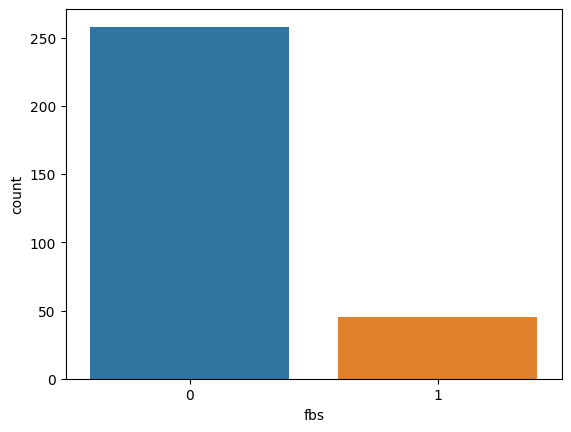

In [39]:
sns.countplot(data=df,x='fbs')

* According to the data it looks like there is a higher chance of getting fbs 0 than fbs 1

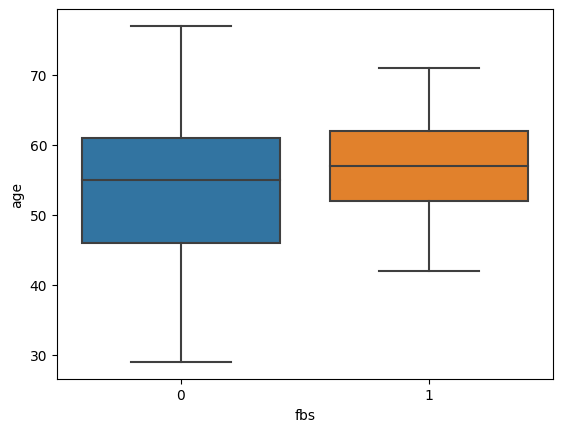

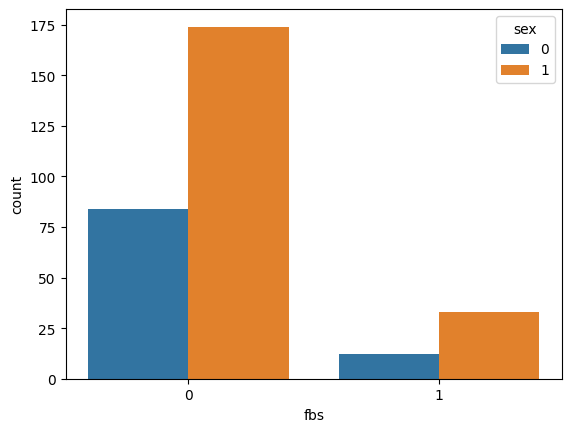

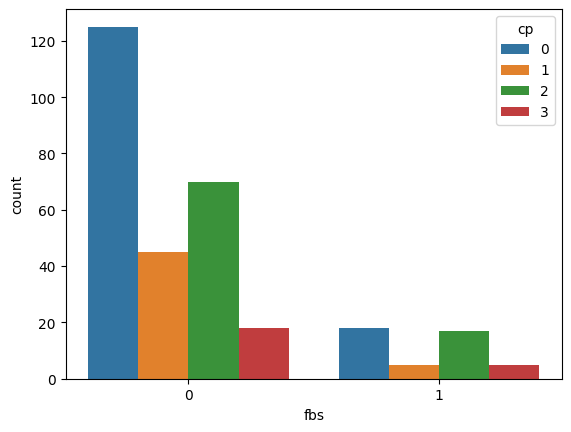

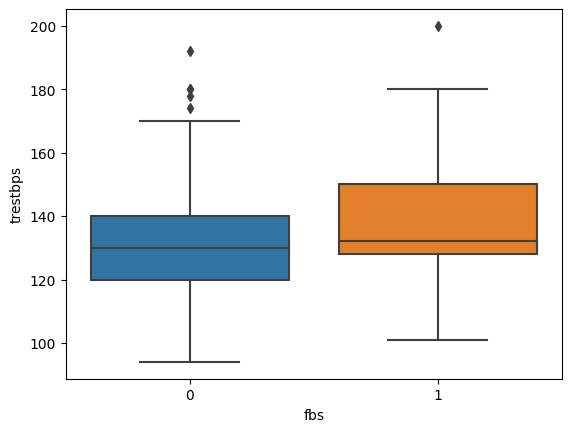

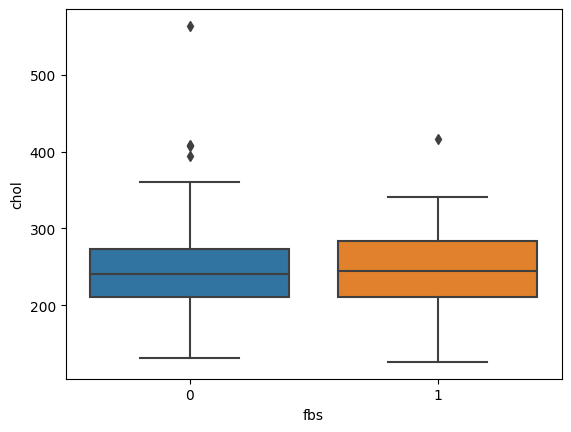

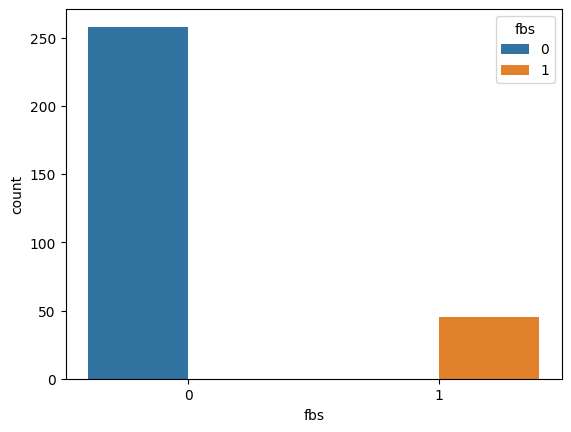

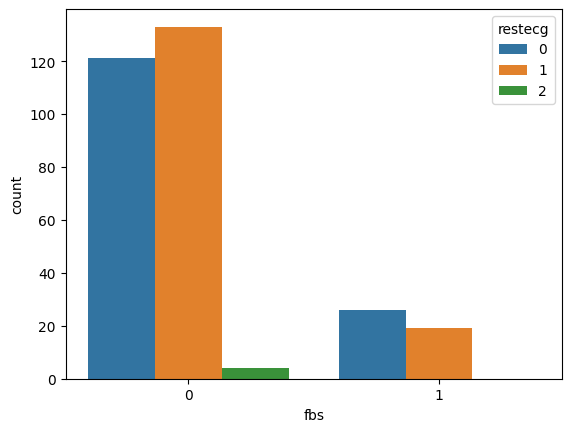

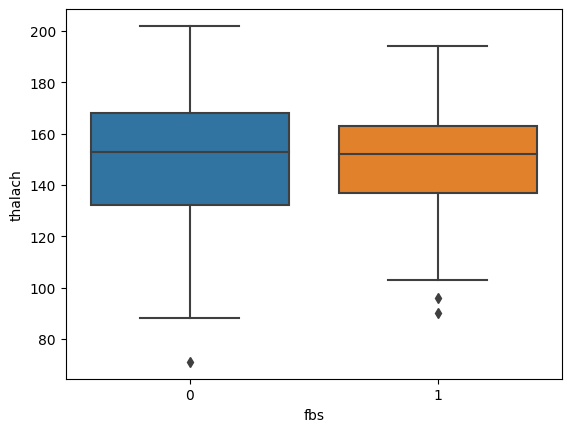

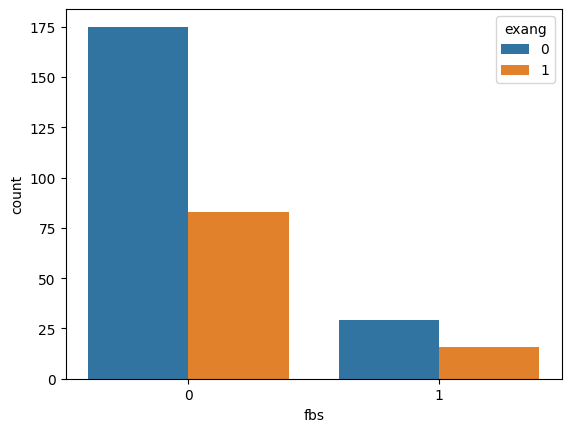

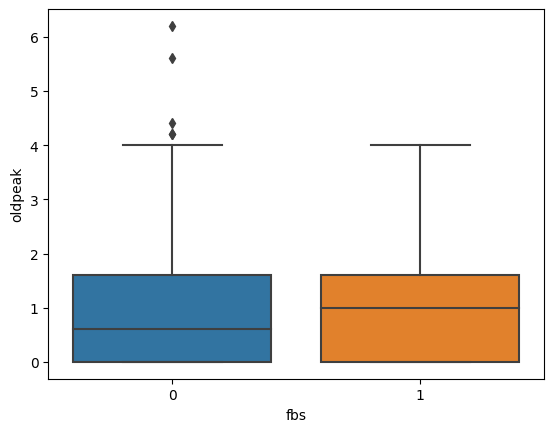

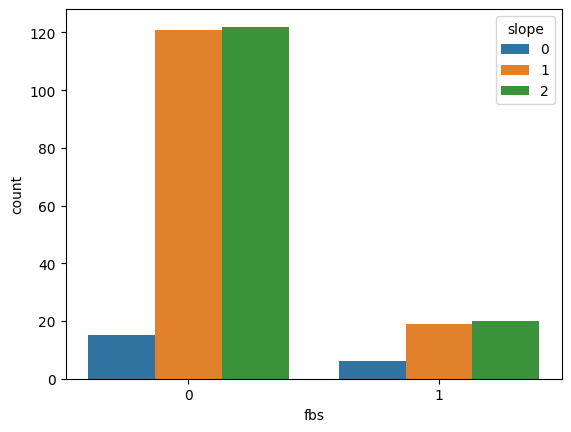

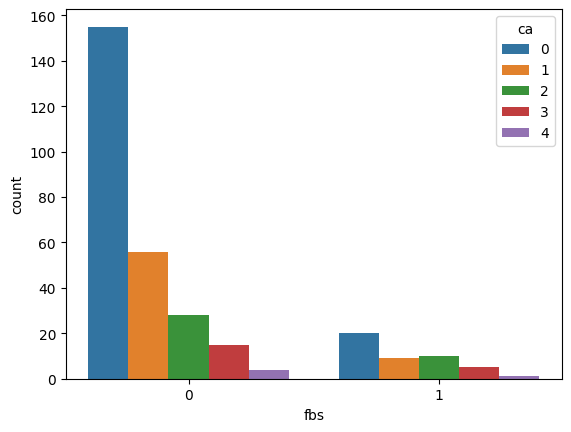

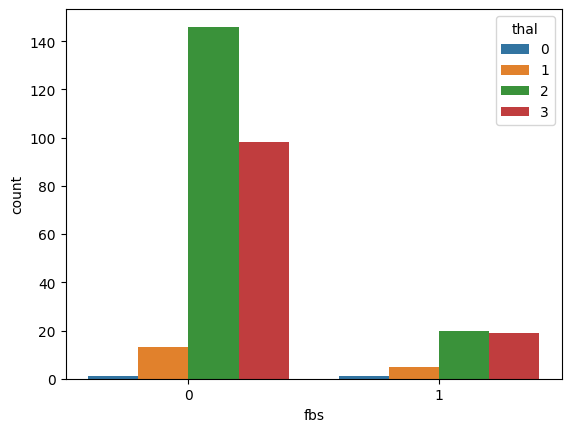

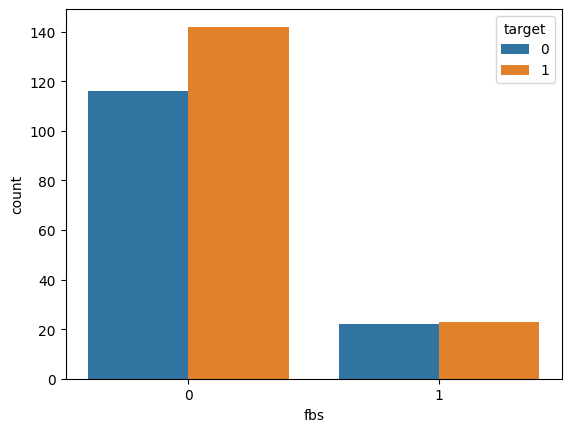

In [40]:
plot_cat('fbs')

In [41]:
#  fbs vs exang

# code source:https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626

# h0: both are independent
# ha: both are dependent

data_crosstab = pd.crosstab(df['fbs'],
                            df['exang'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['fbs'].unique()
columns = df['exang'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, "\nand p value is:", p_value)
print(conclusion)

chisquare-score is: 0.19958603361476107 
and p value is: 0.6550551954238709
Failed to reject the null hypothesis.


In [42]:
#  fbs vs exang

# code source:https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626

# h0: both are independent
# ha: both are dependent

data_crosstab = pd.crosstab(df['fbs'],
                            df['target'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = df['fbs'].unique()
columns = df['target'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."

print("chisquare-score is:", chi_square, "\nand p value is:", p_value)
print(conclusion)

chisquare-score is: 0.23832909479016698 
and p value is: 0.6254155436518223
Failed to reject the null hypothesis.


-- fbs vs restecg --
* We can see the chance for getting restecg 0 is higher for fbs 1
* There is some dependency between the 2 features


-- fbs va thalach --
* From the plot it looks like mean thalach for both fbs labes are same
* so we can say that fbs doesnt affect thalach

-- fbs vs exang --
* From the plot and chi2 test we can conclude fbs and exang are independent

-- fbs vs oldpeak --
* from the plot we can confirm that oldpeak values are higher for fbs label 1

-- fbs vs slope --
* from the plot we can say that fbs and slope are independant

-- fbs vs ca --
* From the plot we can confirm that ca and fbs  are dependent on each other
* we can see that people with fbs 1 have a higher chance of ca 2 than people with fbs 0

-- fbs vs thal --
* From the plot we can say that fbs and thal have some relation
* We can see that people with fbs 0 have a higher chance of having thal 2

-- fbs vs target --
* From the plot and chi2 test we can confirm that fbs and target are not related
* Therefore dropping this feature

In [43]:
drop_col.append('fbs')

<Axes: xlabel='restecg', ylabel='count'>

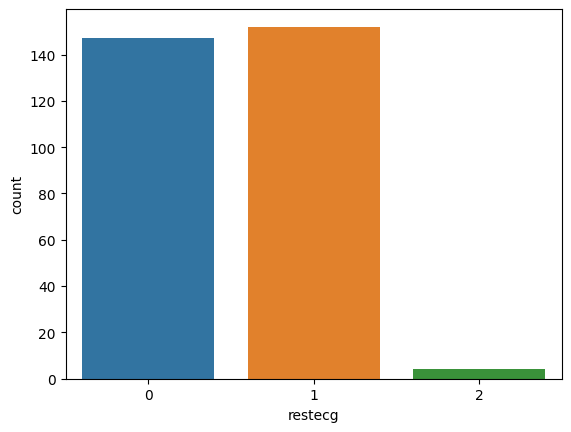

In [44]:
sns.countplot(data=df,x='restecg')

* According to the data the is a higher chance of getting restecg of 0,1 than 2

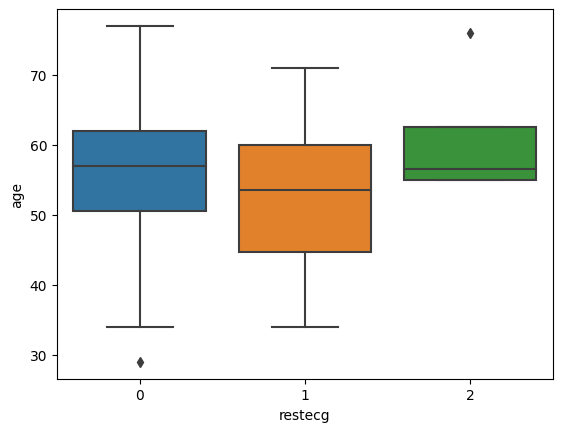

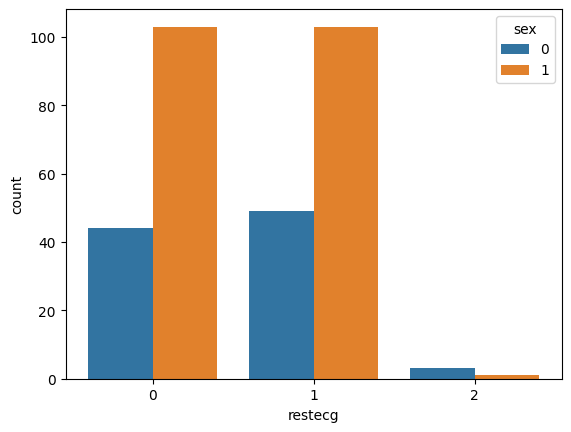

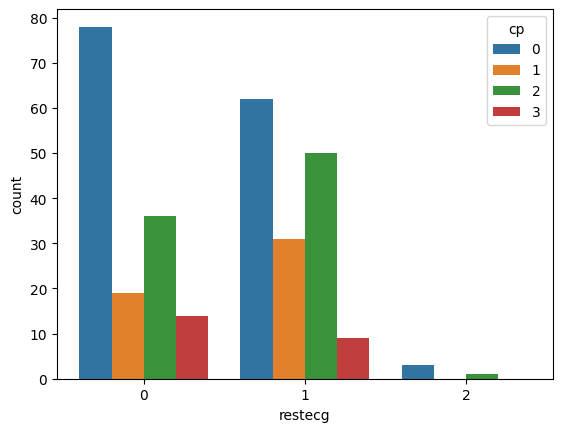

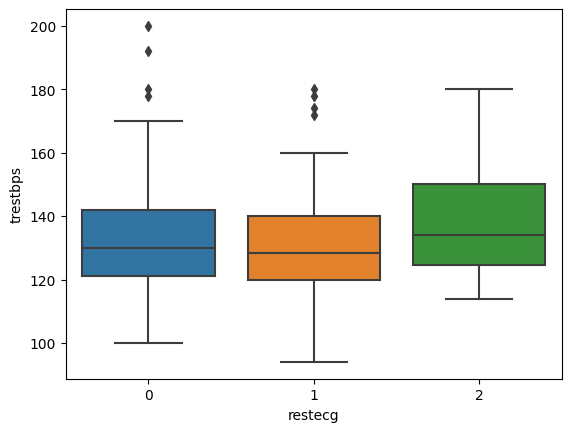

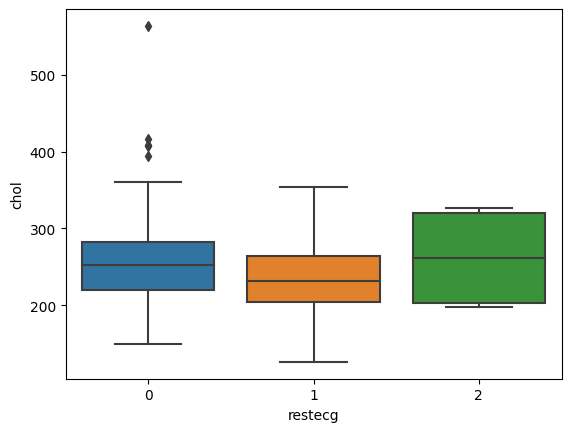

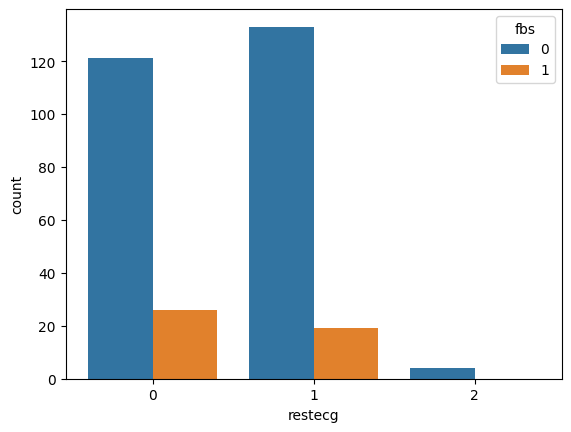

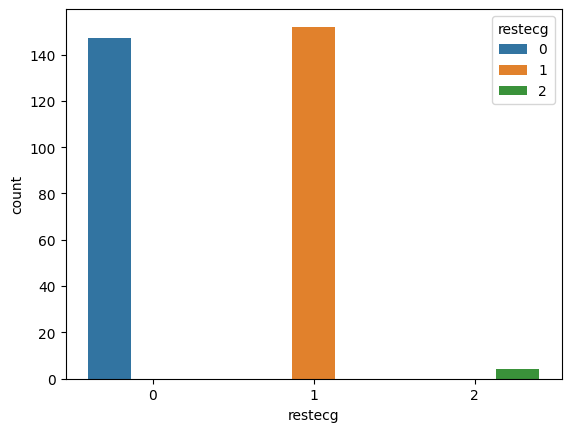

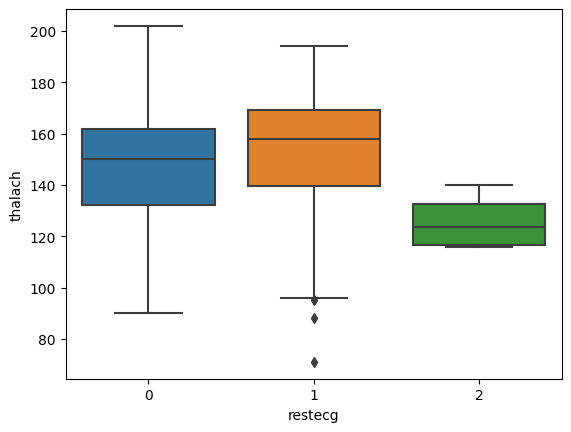

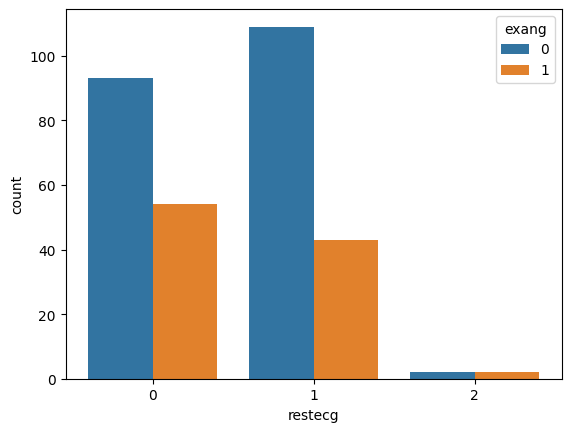

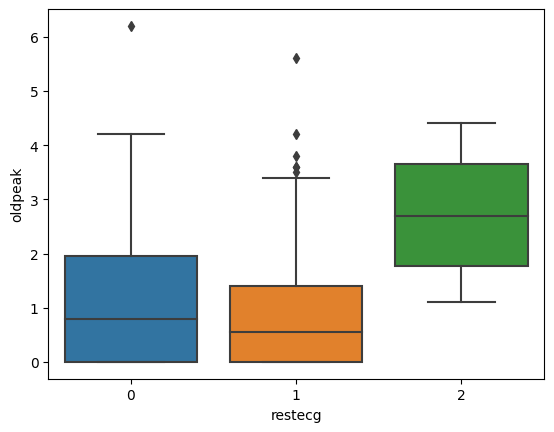

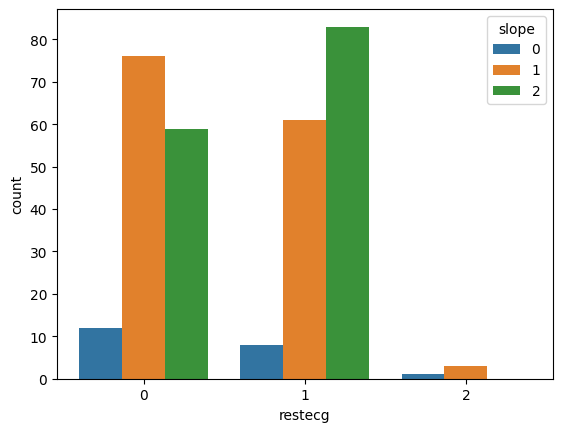

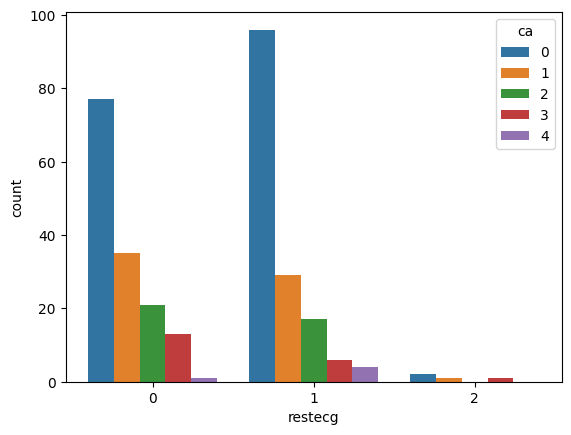

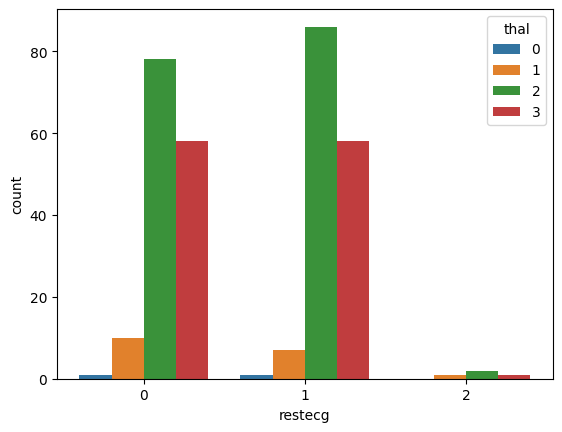

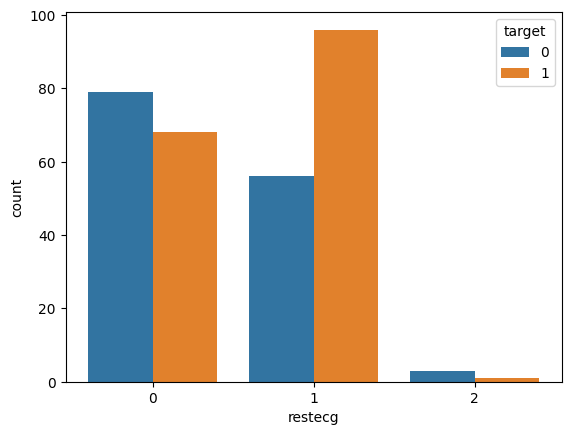

In [45]:
plot_cat('restecg')

-- restecg vs thalach --
* we can see that these 2 features are dependent on each other
* Thalach is least for restecg 2 and highest for restecg 1

-- restecg vs exang --
* we can see there is a relationship between this 2 features
* chances for gwtting exand is higher for restecg 1,2 compared to restecg 0

-- restecg vs oldpeak --
* We can see the oldpeak is highest for restecg 2

-- restecg vs slope --
* There is a clear relationship between restecg and slope
* chances for getting slope 2 is least for restecg 2 and highest fir restecg 1
* restecg of 0 has a higher chance of getting slope 1 compared to restecg 1

-- restecg vs ca --
* We can see there is a clear relationship between these 2 features
* Chances of getting ca(1,2,3) is less for restecg 1 compared to restecg 0
* restecg 1 has a higher chance of getting ca 0,4
* restecg 2 has the least chance of getting ca 2

-- restecg vs thal --
* We can see that restecg (0,1) have equal chance of getting thal 3
* restecg 1 has a higher chance of getting thal 1

-- restecg va target --
* we acn see that restecg affects target
* restecg 1 has higher chance of having target 1(Diabetis positive) compared to rest

<Axes: xlabel='thalach'>

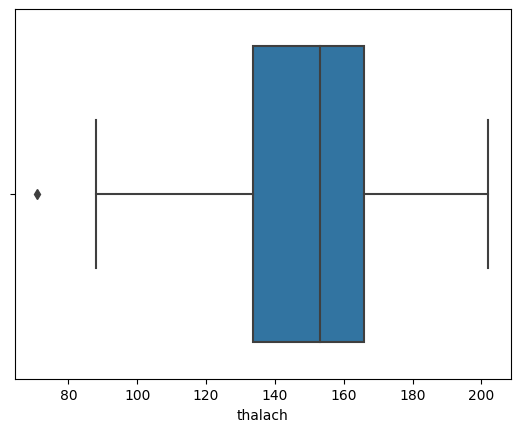

In [46]:
sns.boxplot(data=df,x='thalach')

In [47]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

* We can see that the values for thalach lie between 71,202
* There is one outlier, After further analysis i will decide if i will keep it or remove it

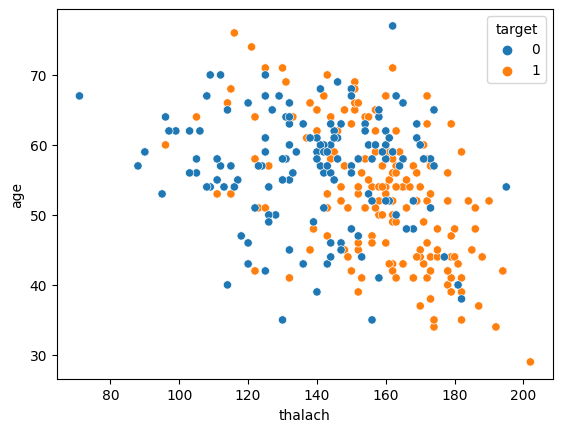

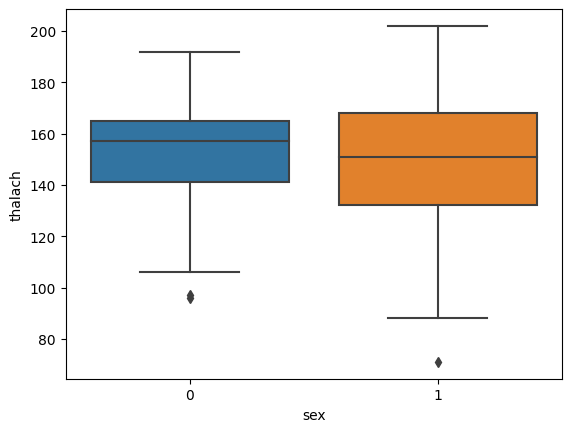

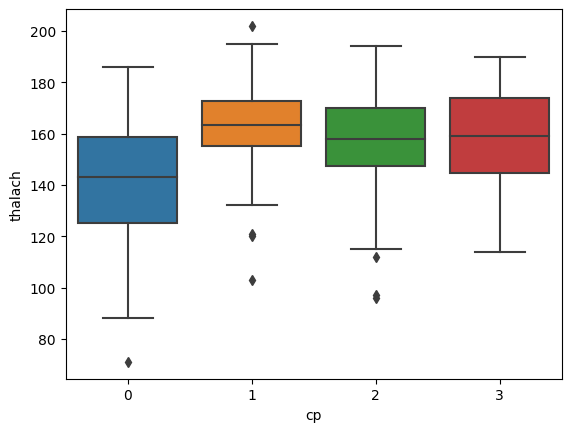

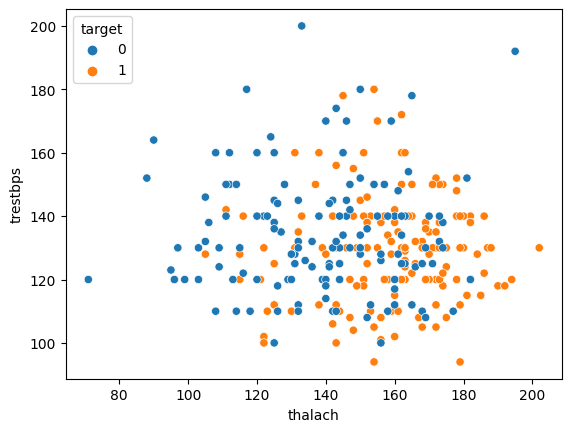

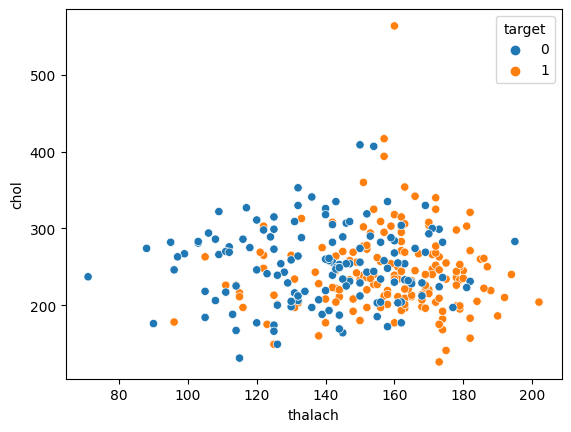

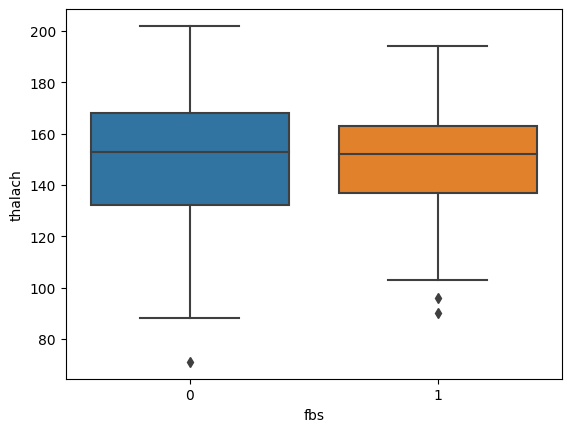

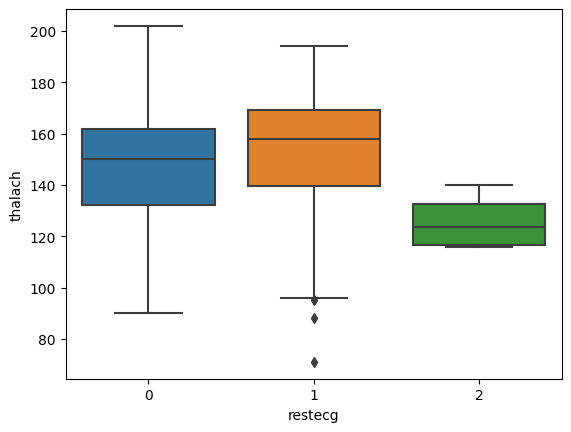

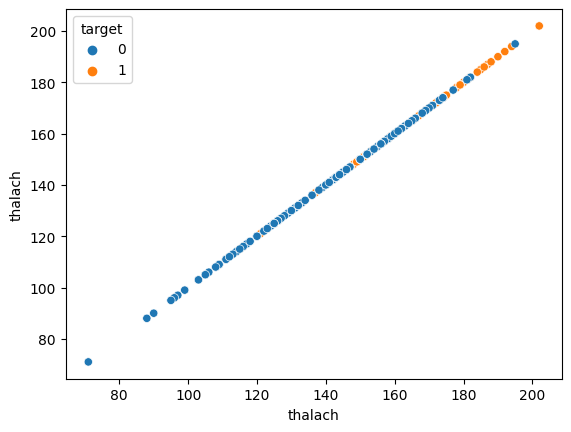

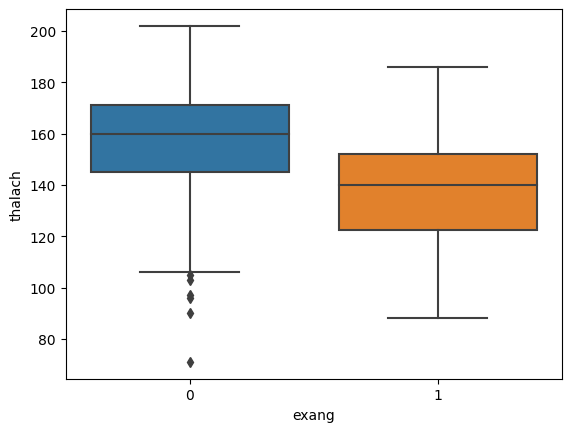

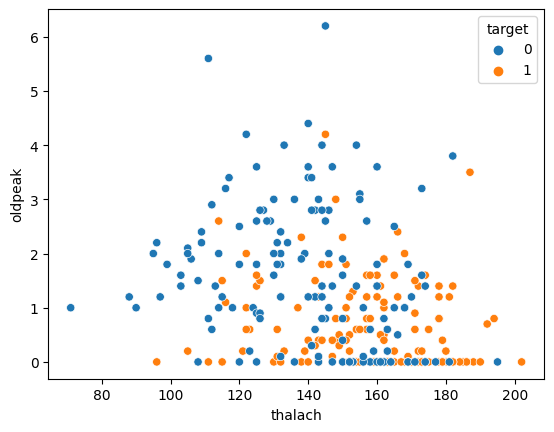

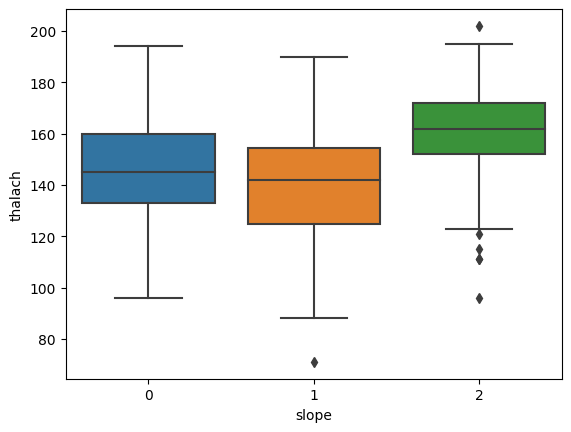

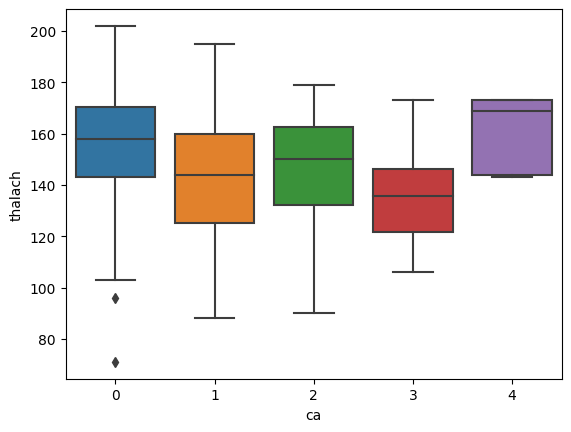

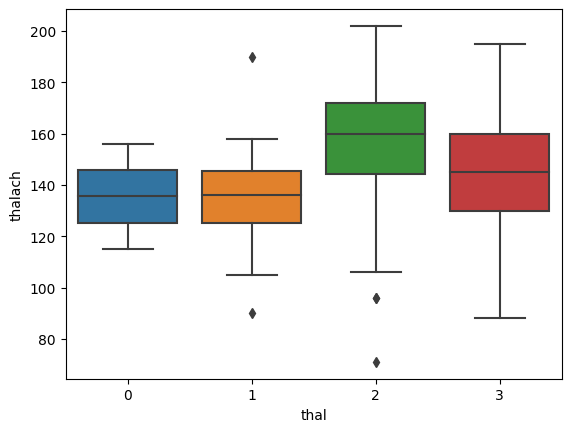

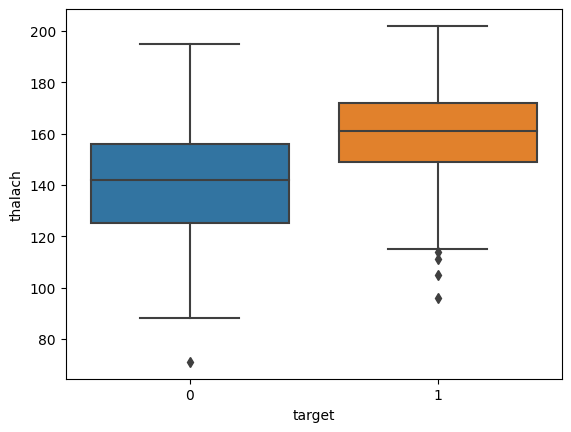

In [48]:
plot_disc('thalach')

-- thalach vs exang --
* We can see that people with lower thalach have less chance of getting exang i.e exang label 1

-- thalach vs oldpeak --
* It looks like there if no colinearity between thalach and oldpeak

-- thalach vs slope --
* We can see that peole with slope 2 have higher thalach compared to others

-- thalach vs ca --
* we can see people with ca 4,0 have the highest thalach
* Perople with ca 3 have the lowest thalach

-- thalach vs thal --
* people with thal 2 have the highest thalach
* people with thal 3 have the second highest thalach
* people with thal 0,1 have very silimar thalach values

-- thalach vs target --
* We can see people with higher thalach have higher chance of getting diabetis

In [49]:
df = df[df['thalach']>80]

<Axes: xlabel='exang', ylabel='count'>

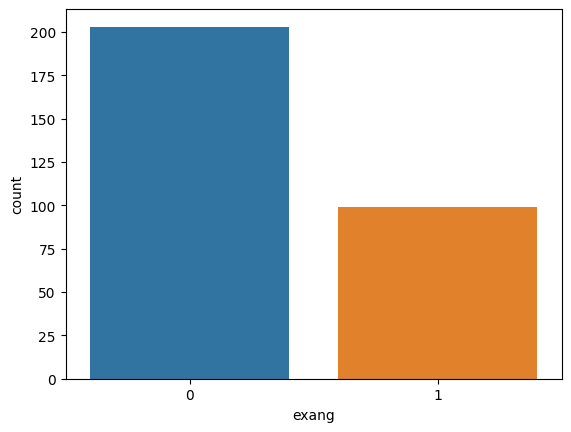

In [50]:
sns.countplot(data=df,x='exang')

* According  to the data most of the people have exang label 0


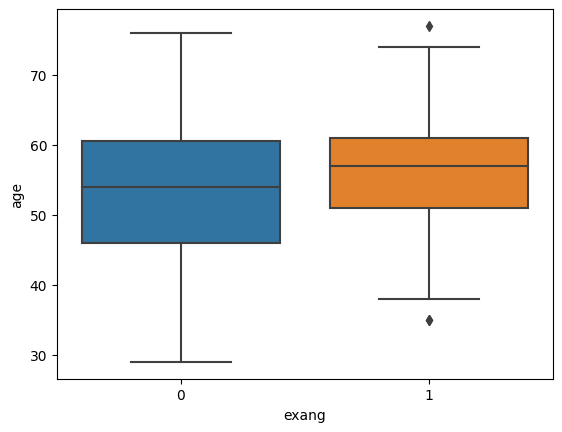

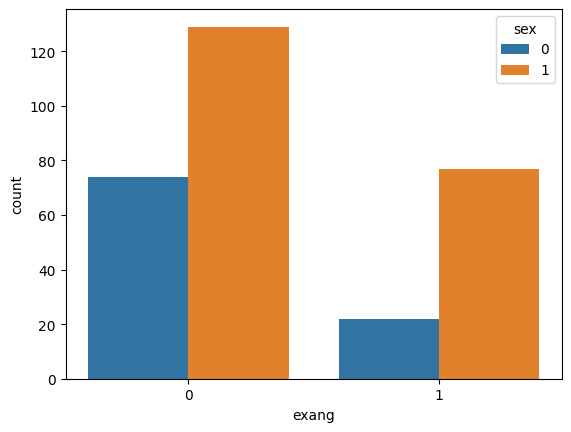

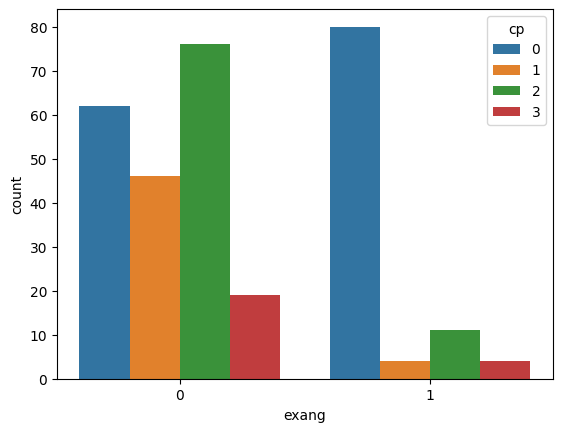

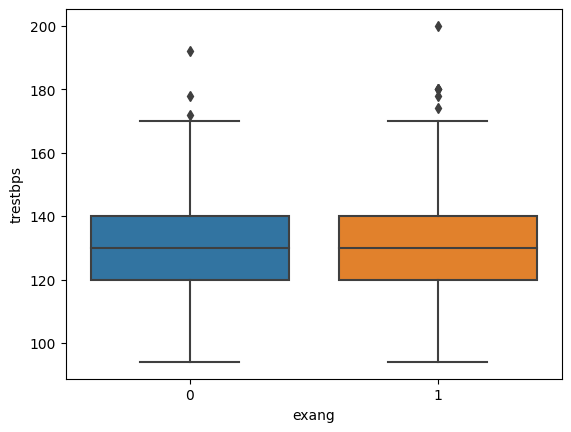

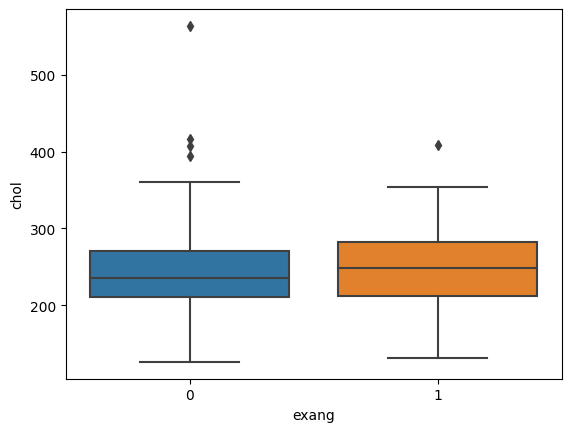

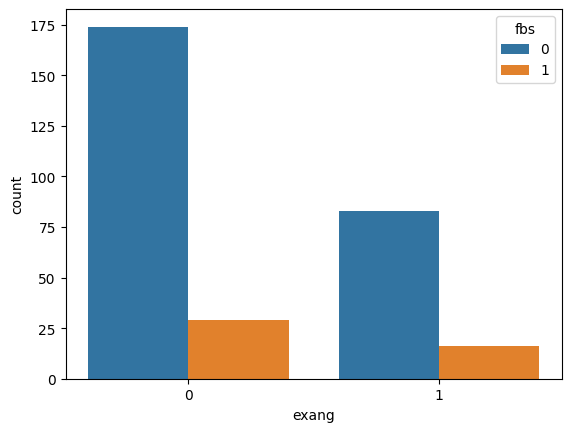

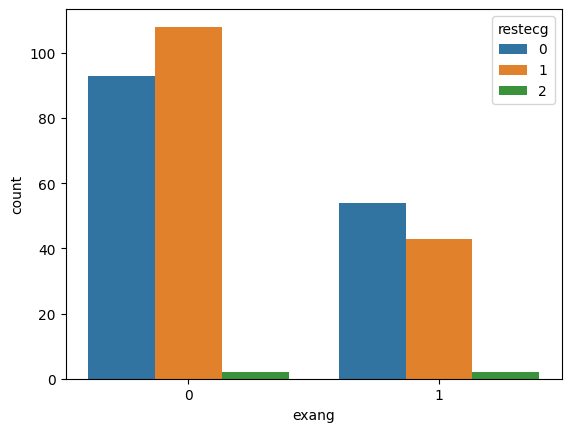

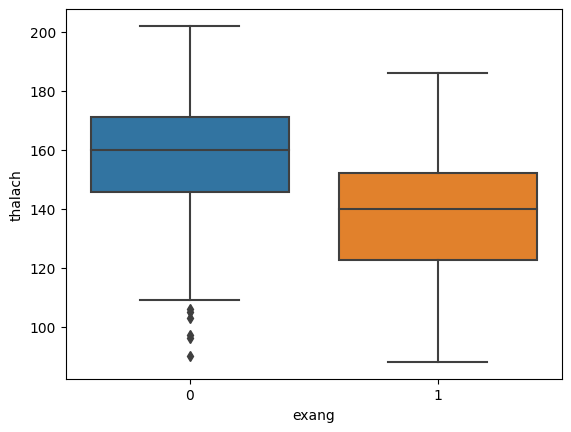

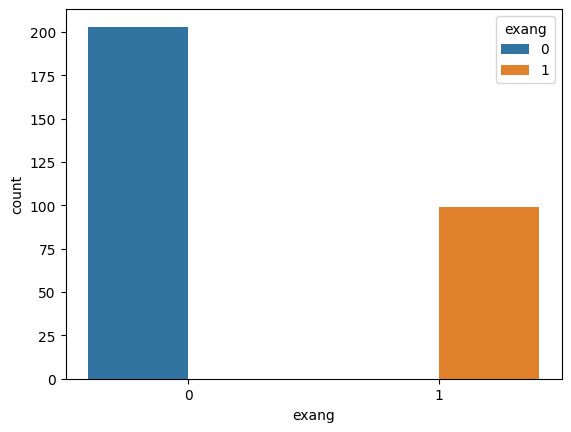

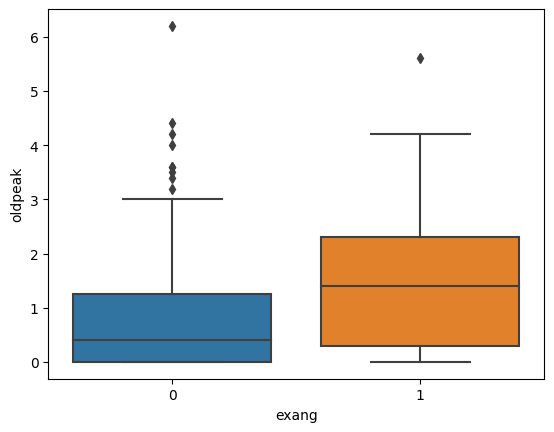

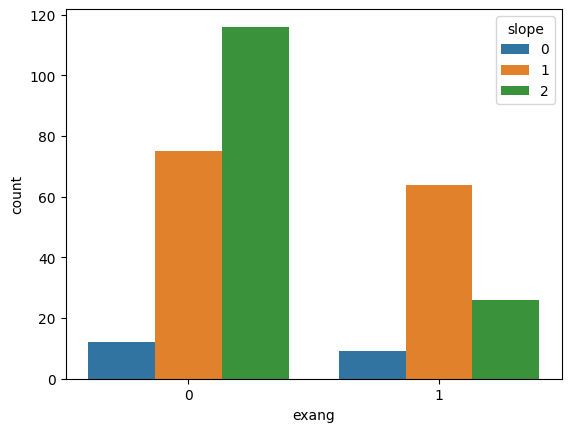

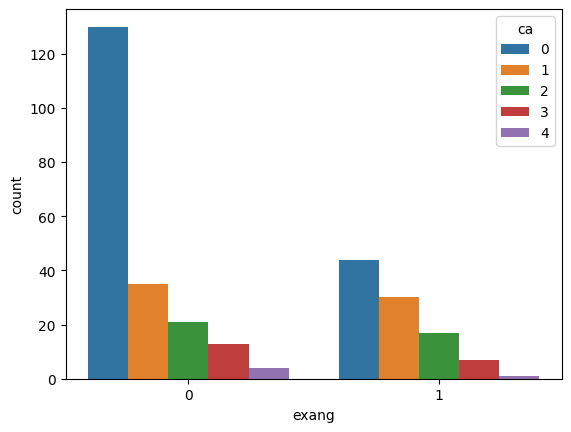

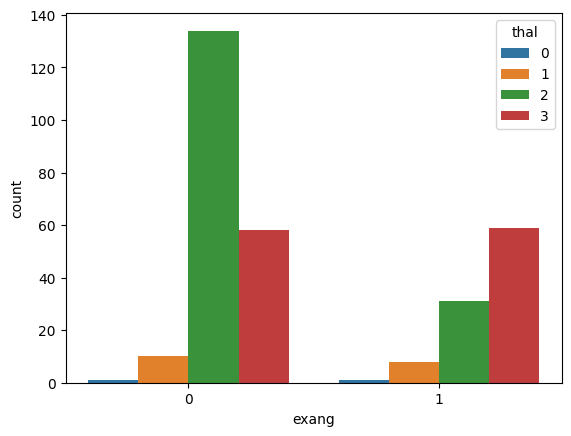

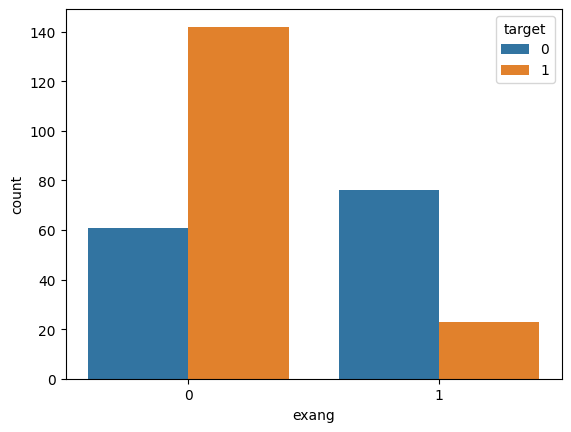

In [51]:
plot_cat('exang')

-- exang vs oldpeak --
* We can see that people with higher oldpeak have a chance of getting exang label 1

-- exang vs slope --
* people with exang 1 have a higher chance of getting slope 1 compared to people with exang 0
* people with exang 0 have a higher chance of getting slope 2 compared to people with exang 1

-- exang vs ca --
* People with exang 0 have a higher chance of getting ca 0 compared to other ca values
* people with exang 1 have a higher chance of getting ca 1,2,3,4 compared to ca 1

-- exang vs thal --
* people with exang 0 have a higher chance of getting thal 2
* People with exang 1 have ahigher chance of getting thal 3

-- exang vs target --
* People with exang 1 have lower chance of getting diabetis

<Axes: xlabel='oldpeak'>

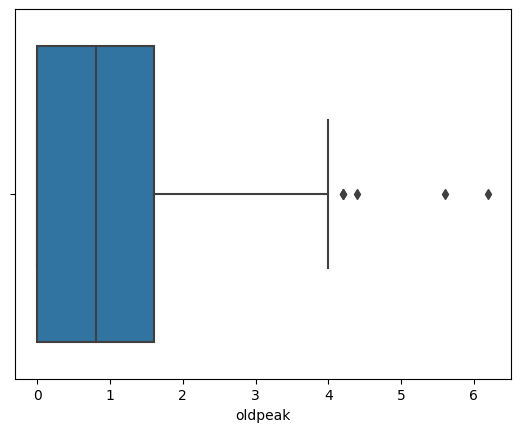

In [52]:
sns.boxplot(data=df,x='oldpeak')

In [53]:
df['oldpeak'].describe()

count    302.000000
mean       1.039735
std        1.163000
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

* As we can see there are 4 outliers
* After further analysis i will decide to keep it or not

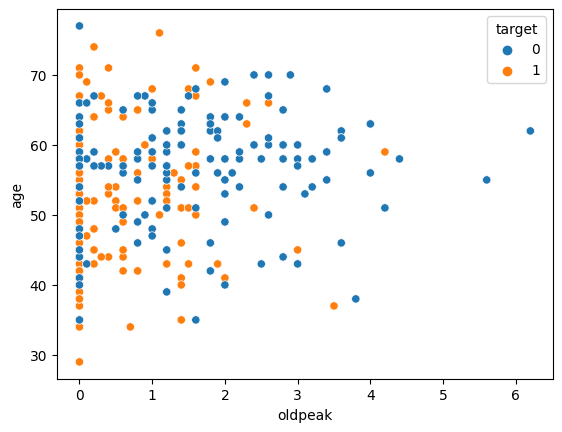

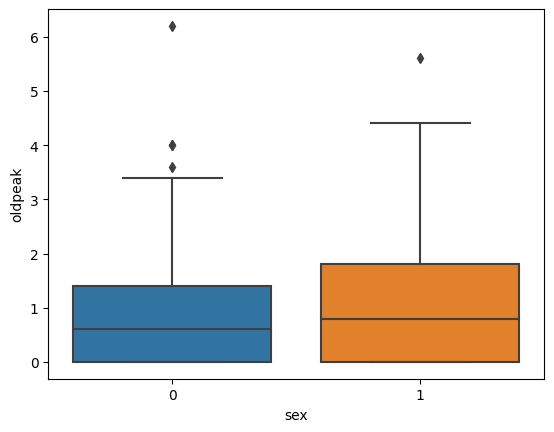

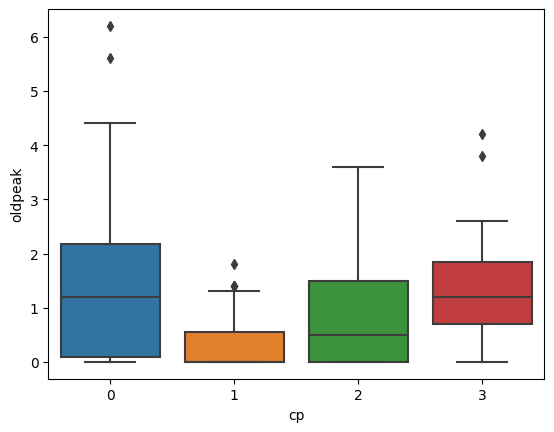

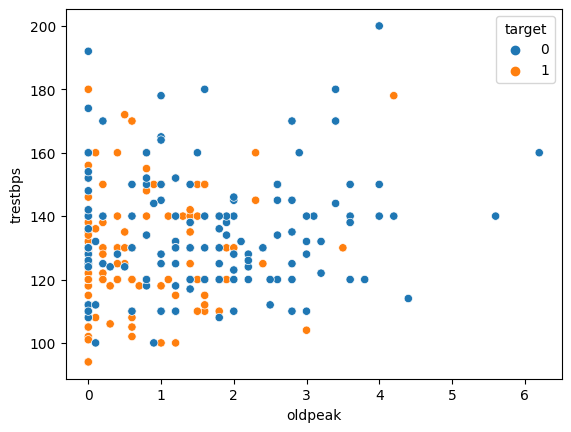

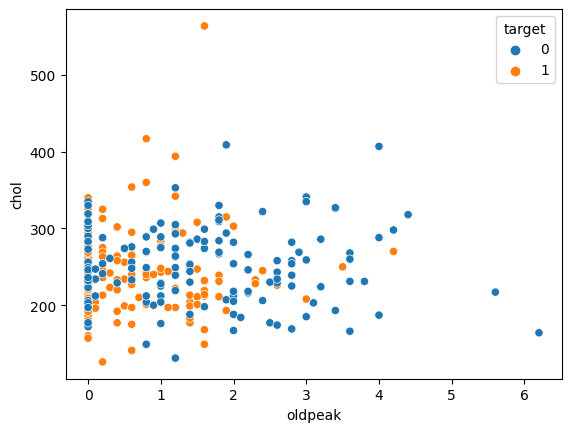

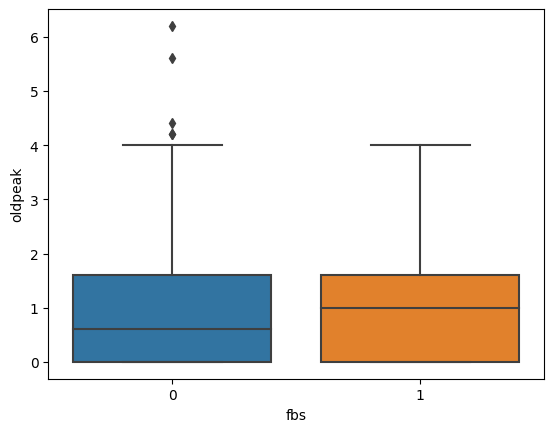

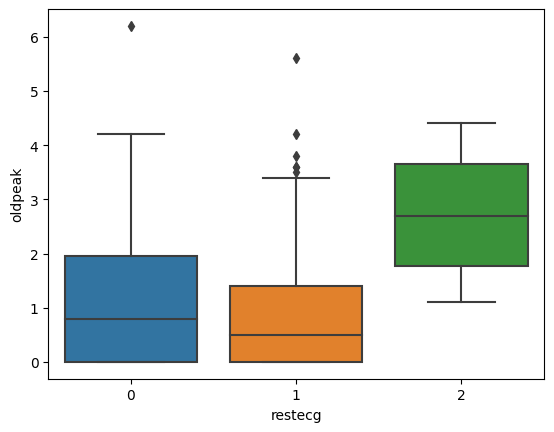

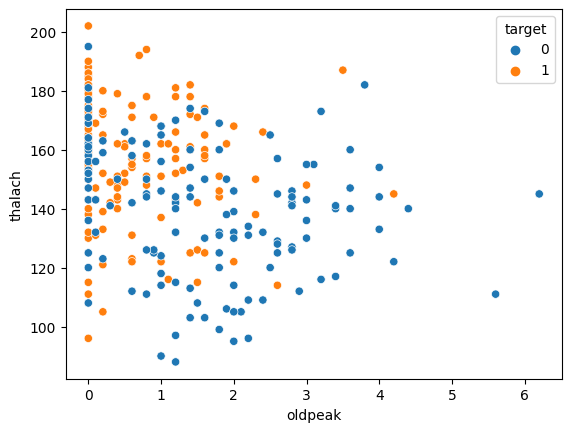

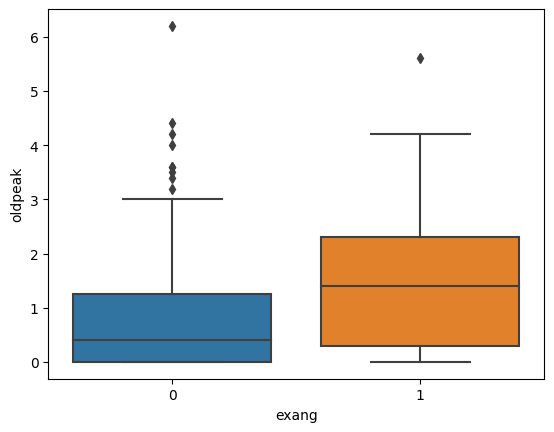

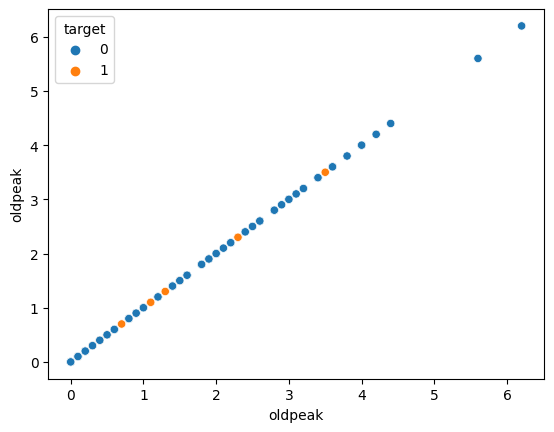

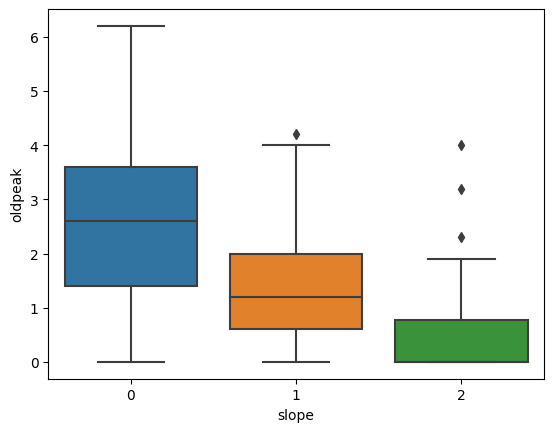

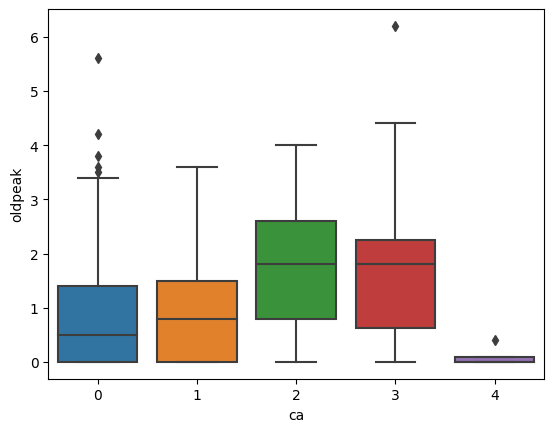

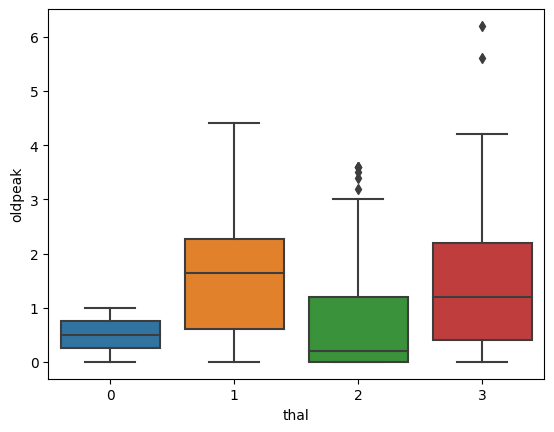

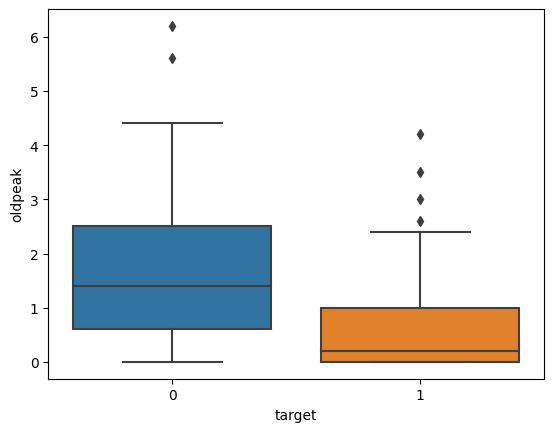

In [54]:
plot_disc('oldpeak')

-- oldpeak vs slope --
* As we can see values for slope decreases as slope increases

-- oldpeak vs ca--
* We can see oldpeak values are highest for ca 2,3 and least for ca 4

-- oldpeak vs thal --
* We can see oldpeak values are highest for thal 1,3 and lowest for thal 0,2

-- oldpeak vs target --
* We can see people with higher oldpeak are less likely to get diabetis

<Axes: xlabel='slope', ylabel='count'>

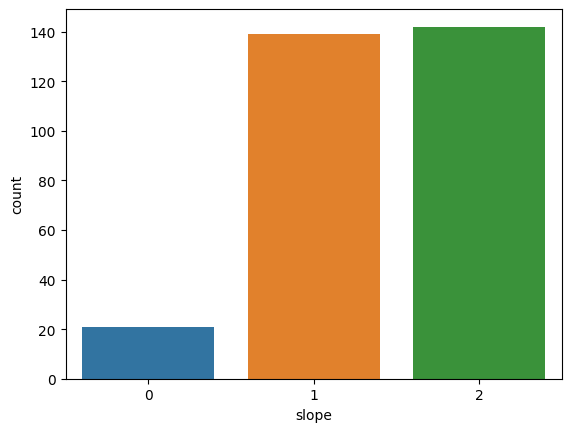

In [55]:
sns.countplot(data=df,x='slope')

* There are a lot of people with slope 1,2 compared to slope 0

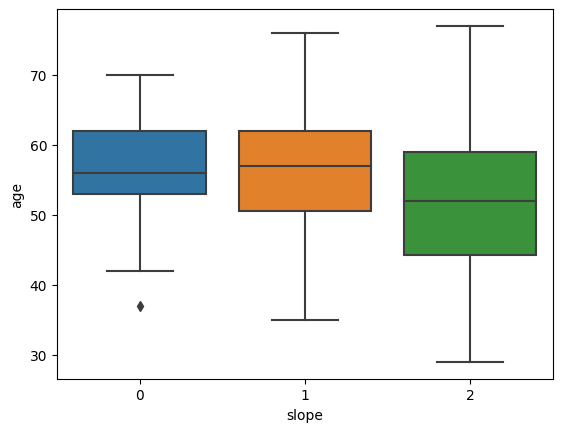

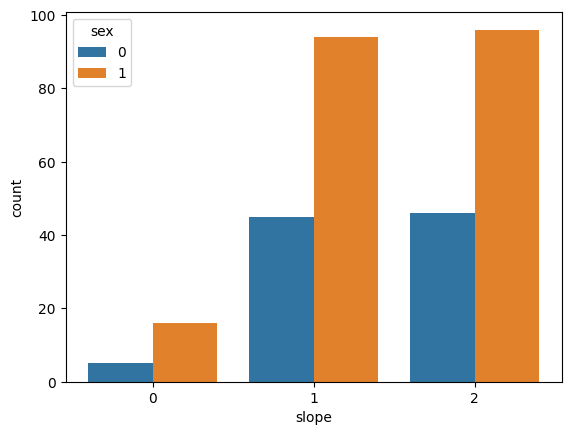

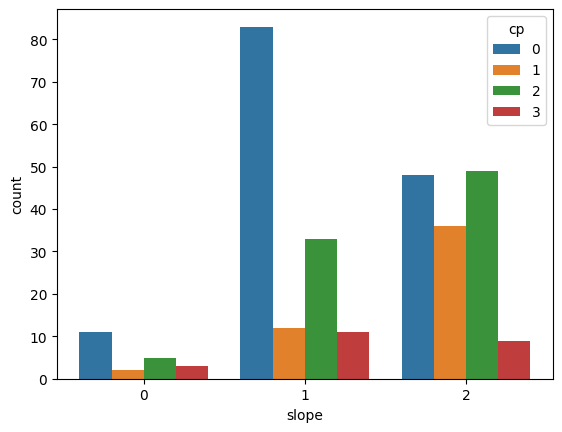

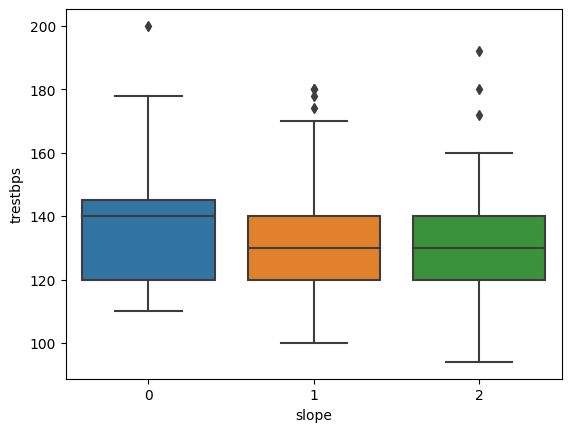

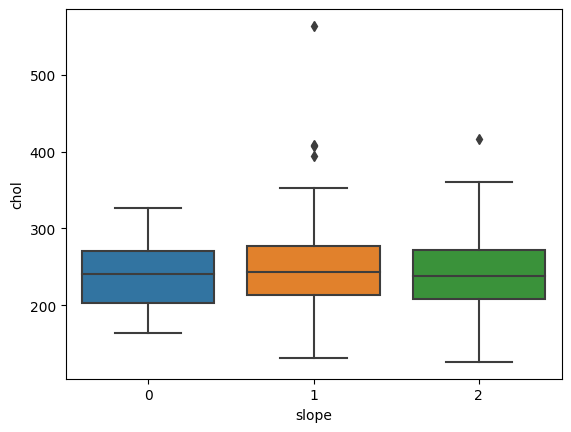

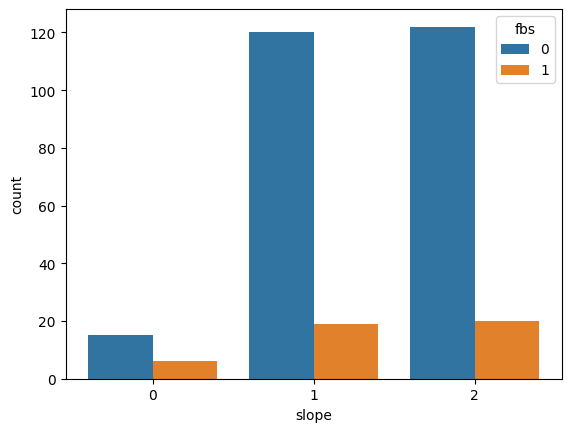

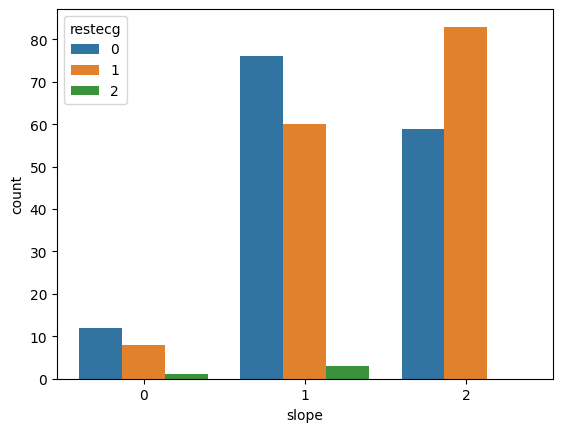

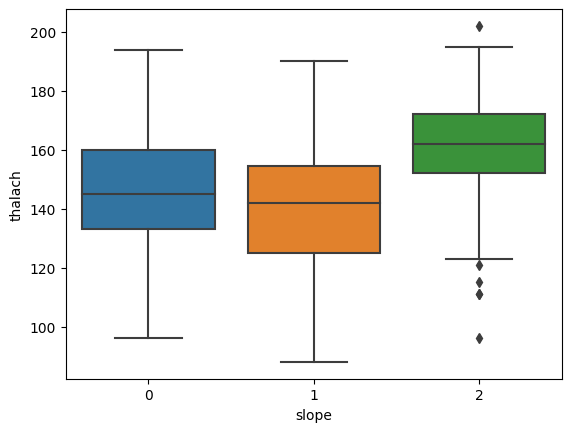

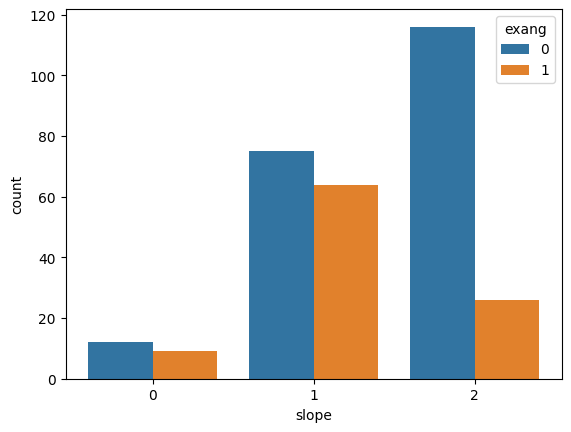

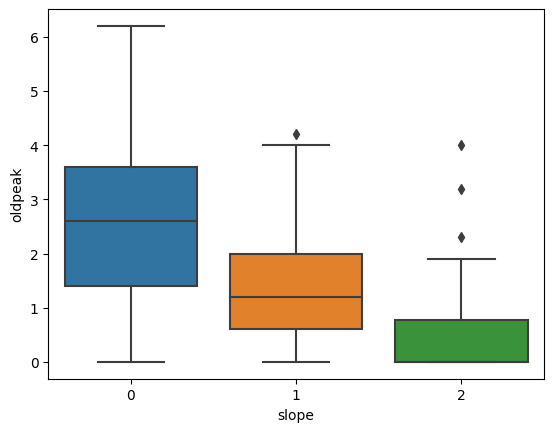

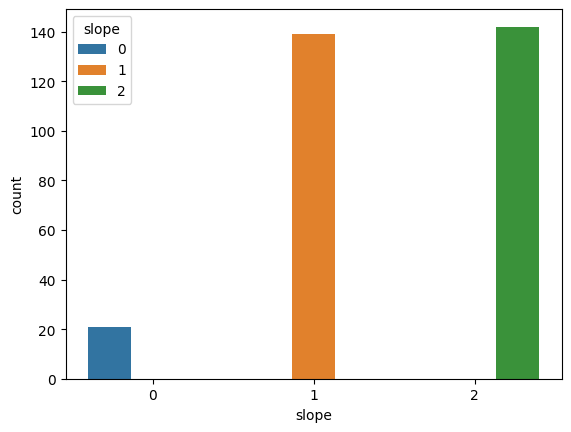

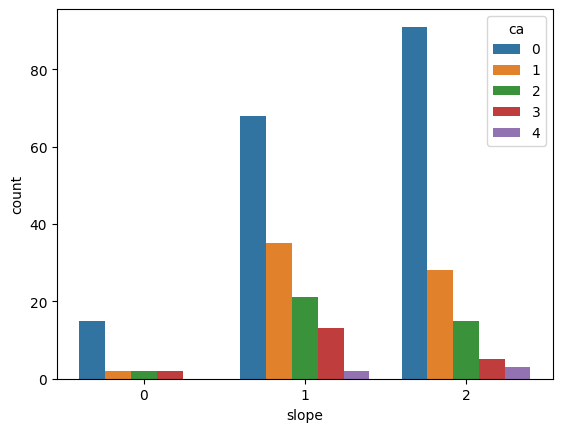

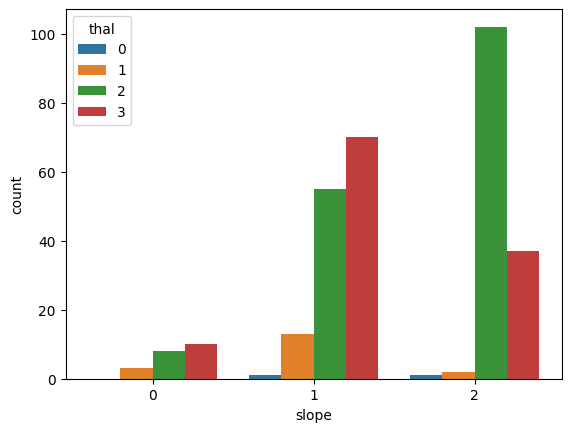

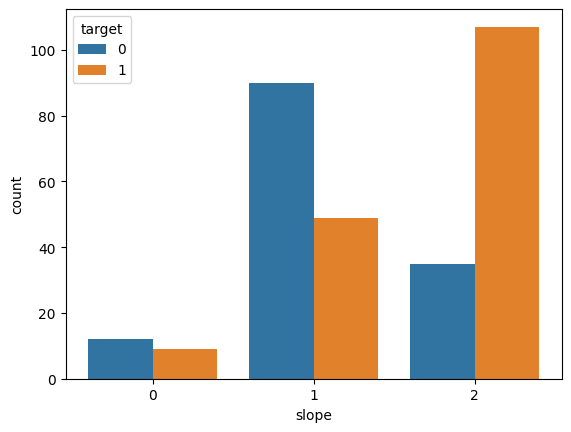

In [56]:
plot_cat('slope')

-- slope vs ca --
* People with slope 2 have a higher chance of having ca 0,4
* People with slope have a higher chance of getting ca 1,2,3
* peope with slope 0 have very less values for any ca category

-- slope vs thal --
* People with slope 2 have a higher chance of thal 2 compared to rest of the thal values
* people with slope 0,1 have a higher chance of getting thal 3 compared to rest of the thal values

-- slope vs target --
* People with slope 2 have a highest chance of getting diabetis
* people with slope 1 have the lowest chance of getting diabetis

<Axes: xlabel='ca', ylabel='count'>

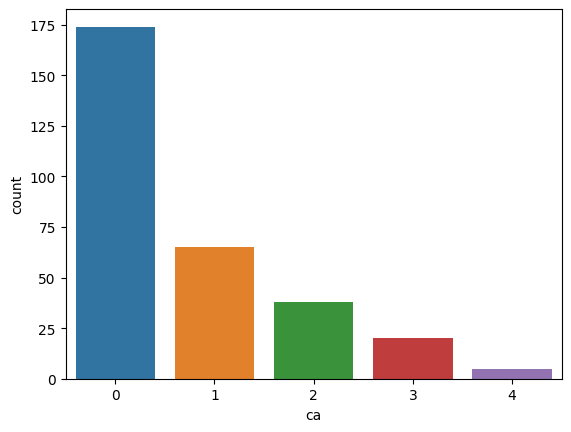

In [57]:
sns.countplot(data=df,x='ca')

* We can see that most of the people have less ca values
* As ca values increases the number of people decrease

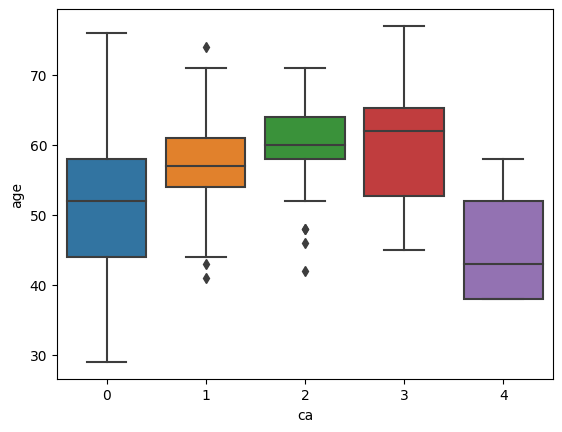

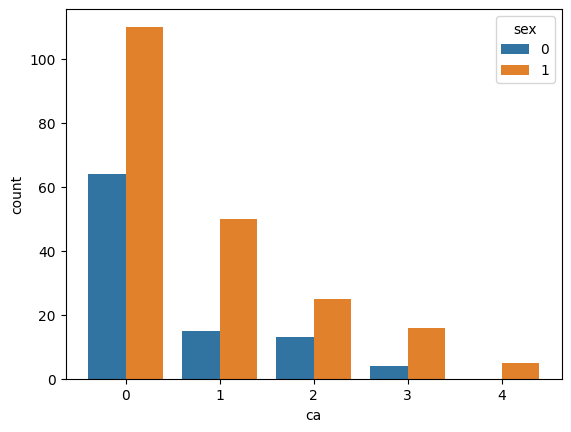

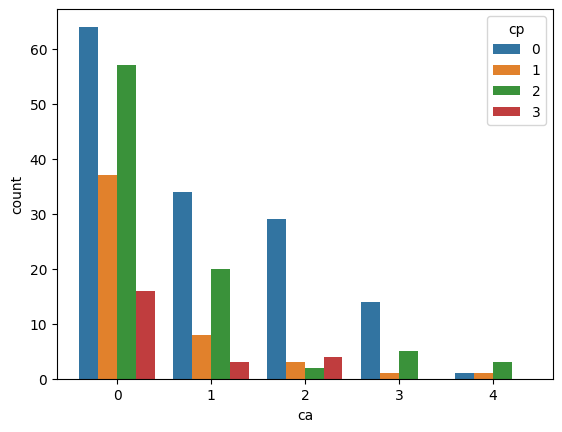

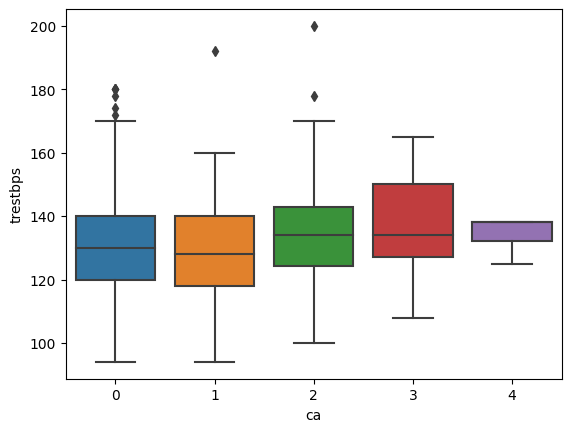

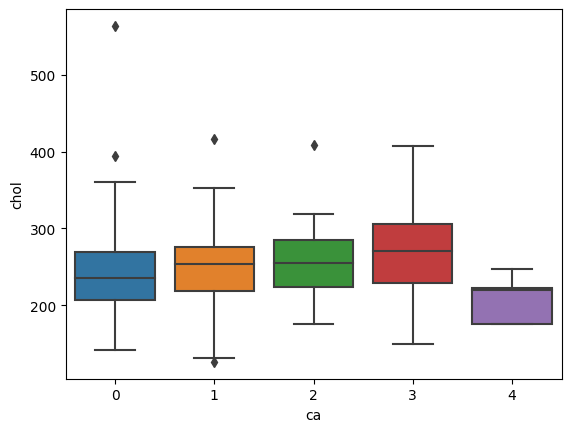

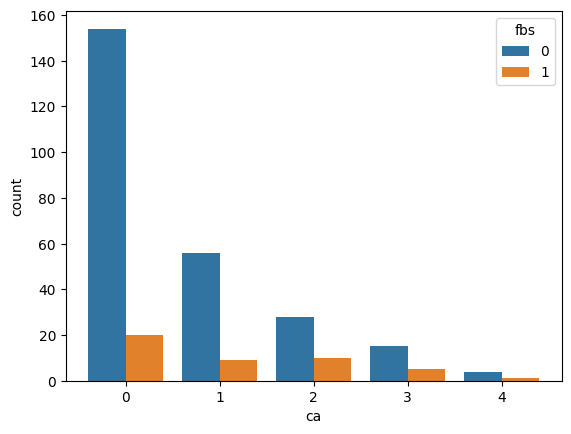

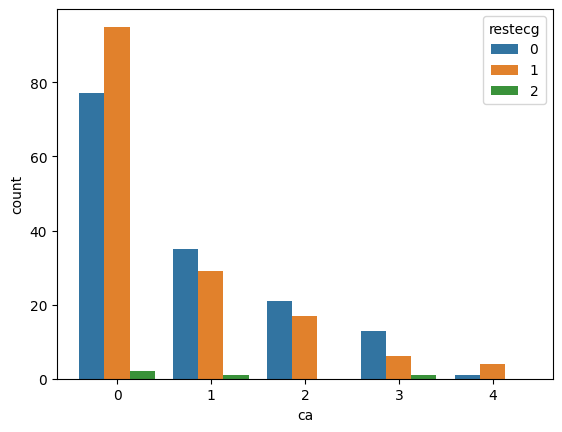

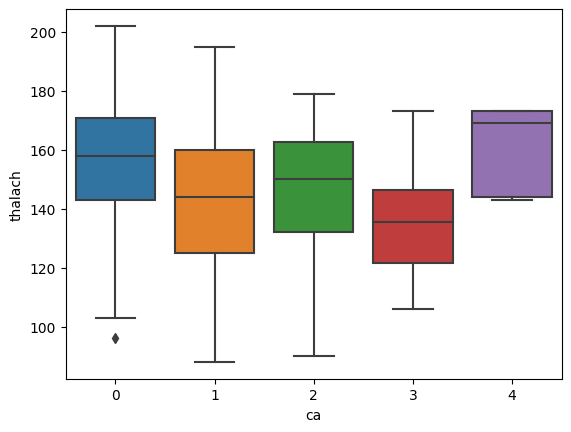

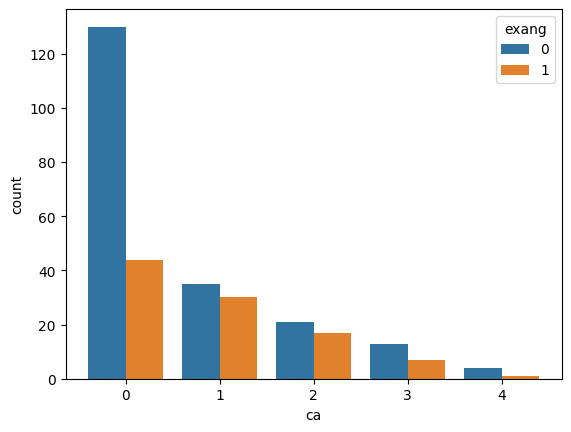

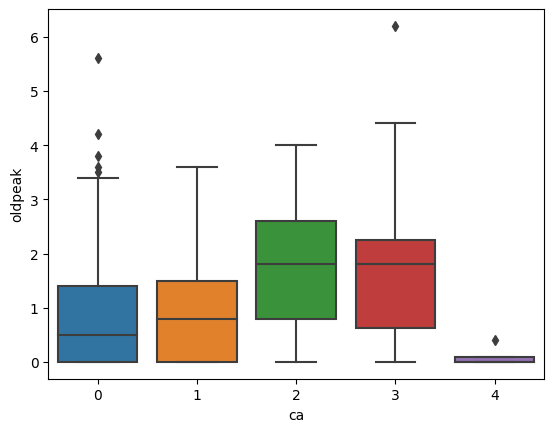

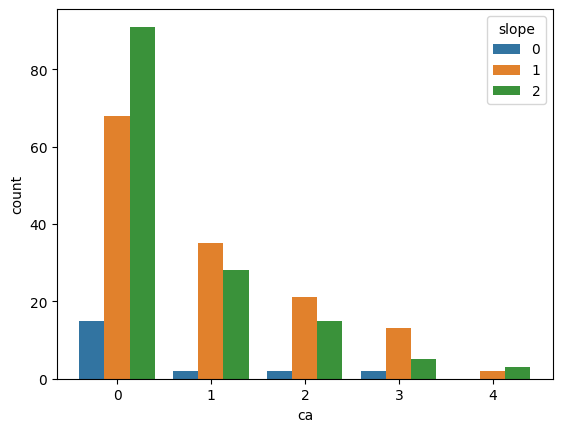

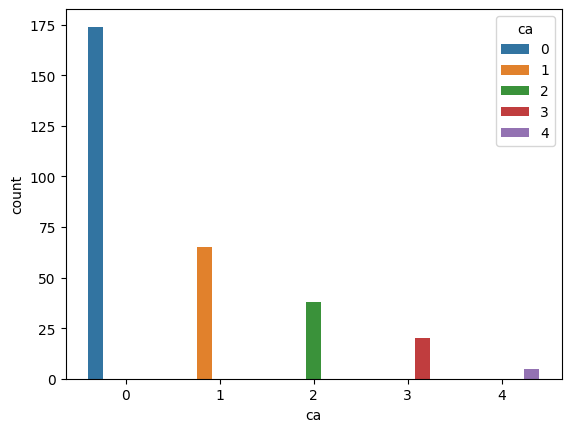

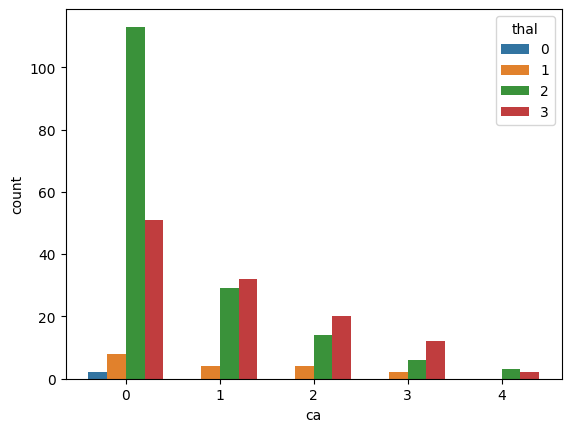

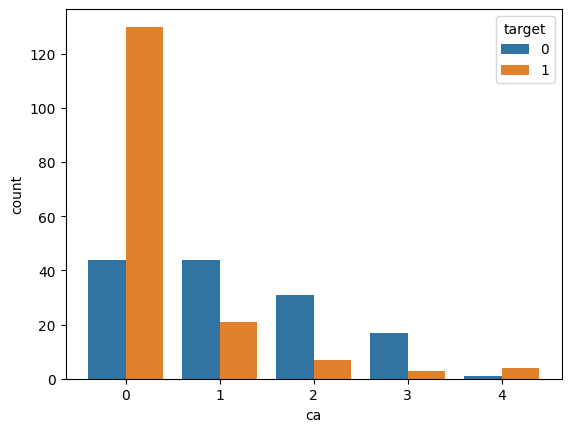

In [58]:
plot_cat('ca')

-- ca vs thal --
* We can see that people with ca 0 have a higher chance of getting thal 2 over the rest of thal values
* People with ca 1,2,3,4 have a high chance of getting thal 3 over rest of the thal values
 -- ca vs target --
 * Peoplw with ca 0,4 have a high chance of getting diabetis compared to people with people with ca 1,2,3

<Axes: xlabel='thal', ylabel='count'>

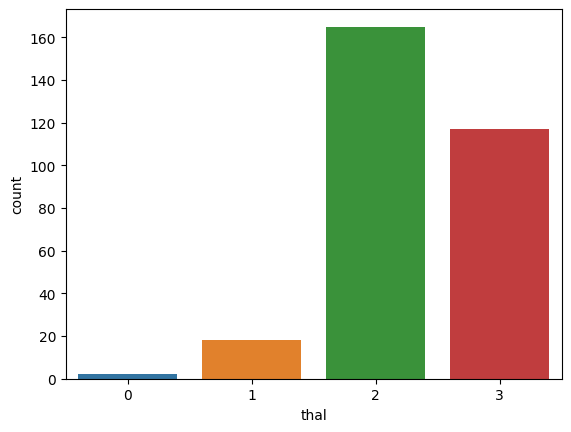

In [59]:
sns.countplot(data=df,x='thal')

* We can see most people have thal 2,3

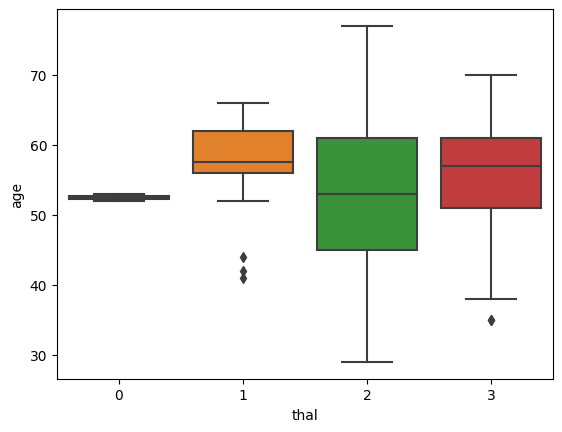

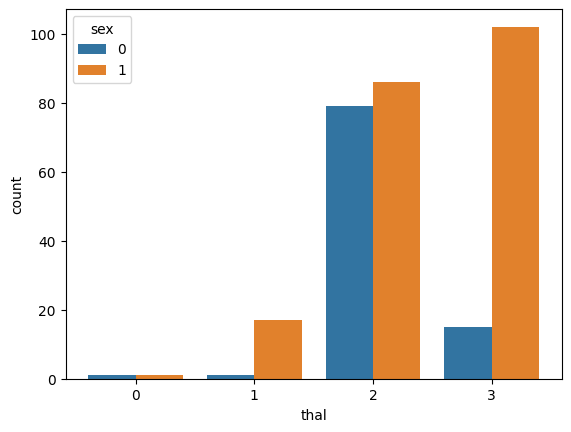

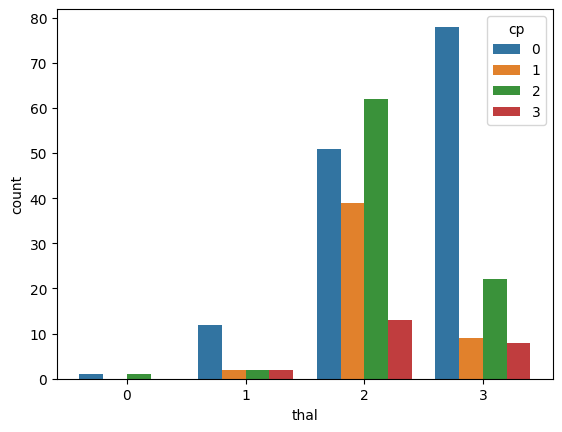

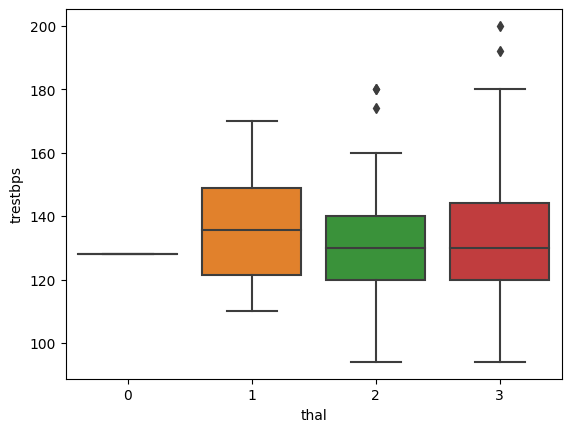

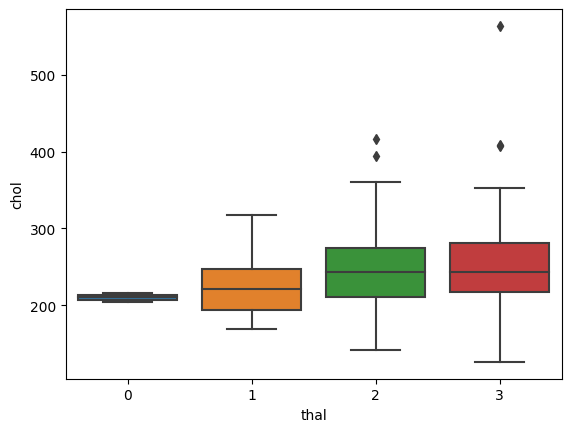

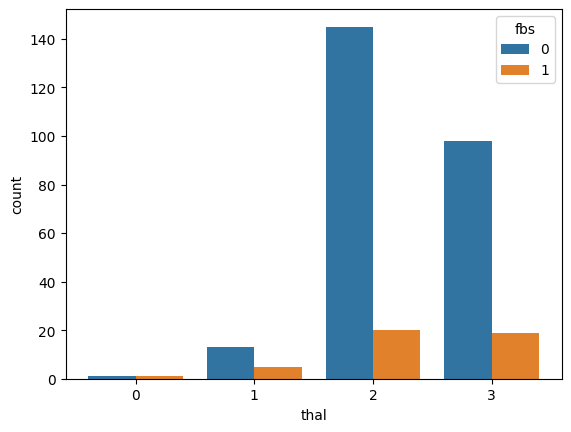

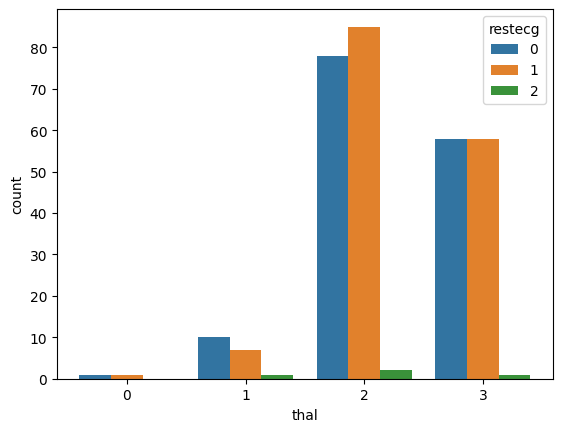

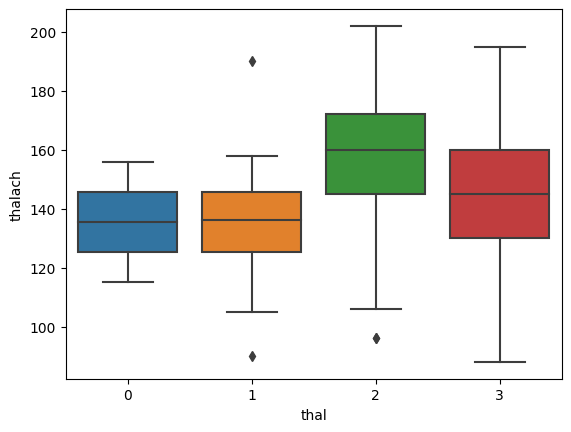

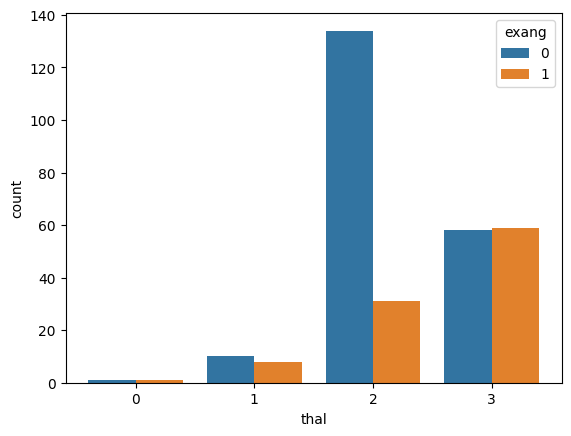

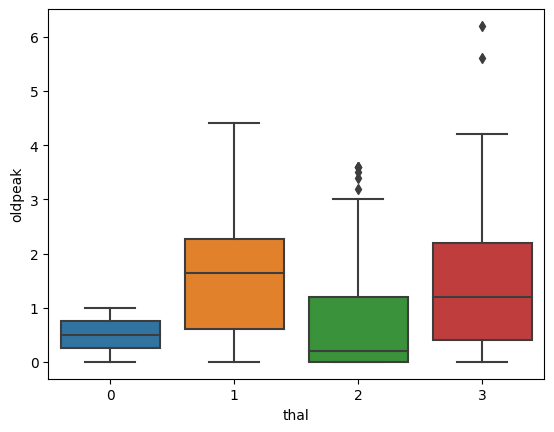

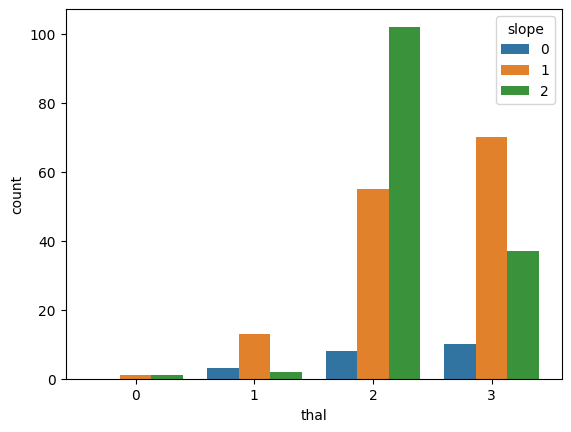

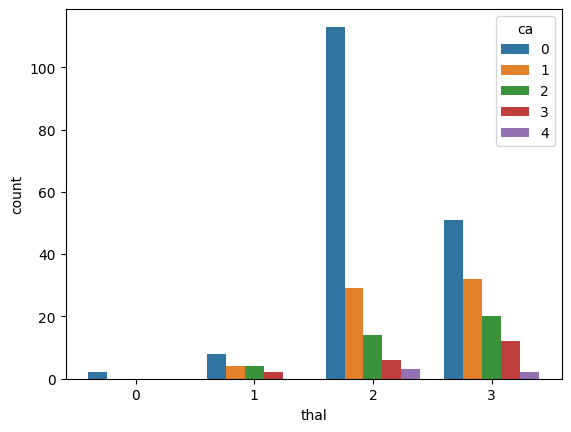

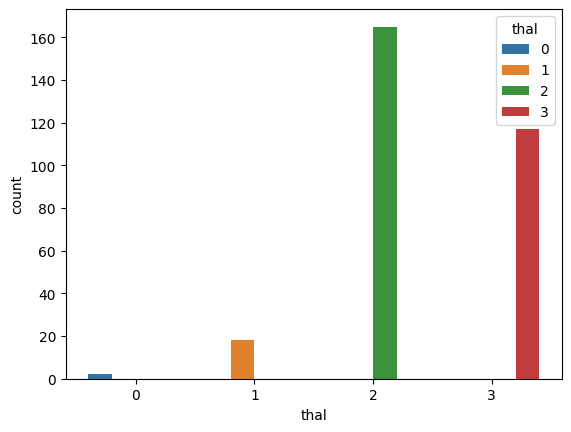

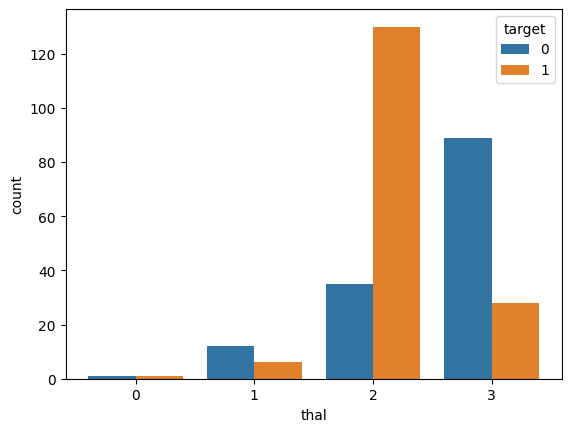

In [60]:
plot_cat('thal')

-- thal vs target --
* People with thal 2 have the highest chance of getting diabetis

After completing the univariate and bivariate analysis i have come to the conclusion that [age,sex,cp,restecg,thalach,fbs,exang,oldpeak,slope,ca,thal] are the most important factors which determing if a person has diabetis

<Axes: xlabel='target', ylabel='count'>

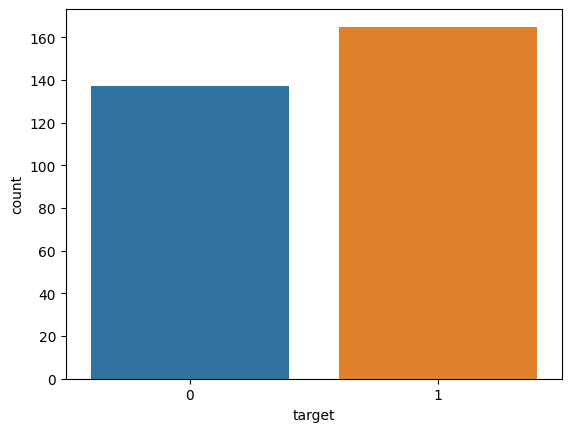

In [61]:
sns.countplot(data=df,x='target')

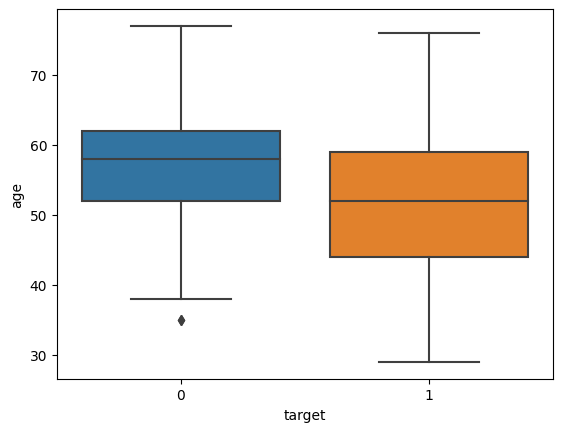

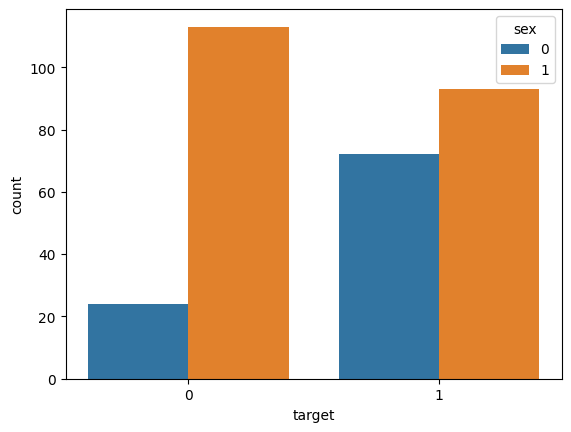

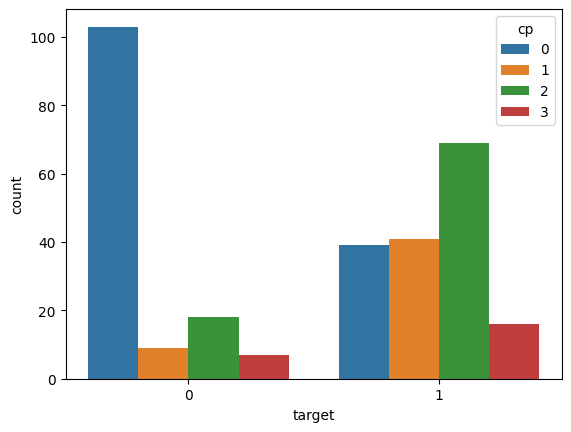

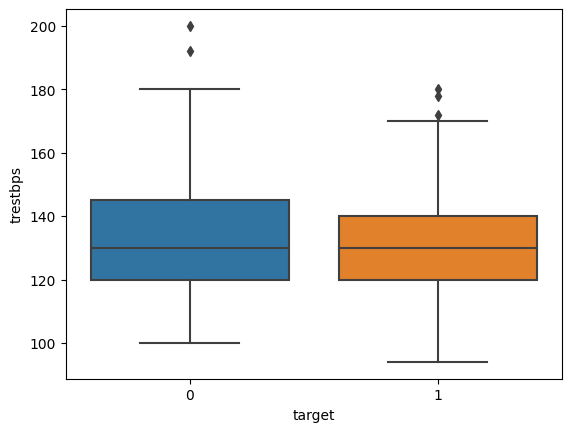

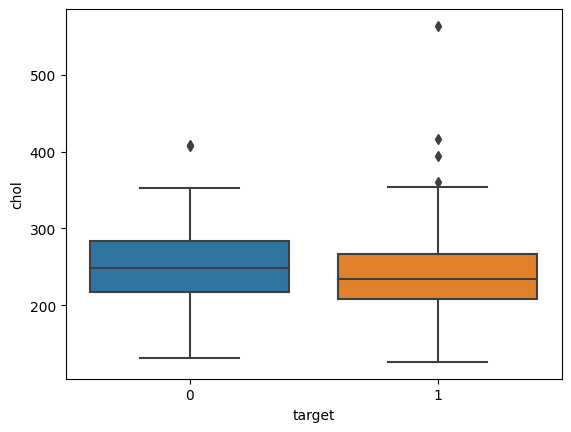

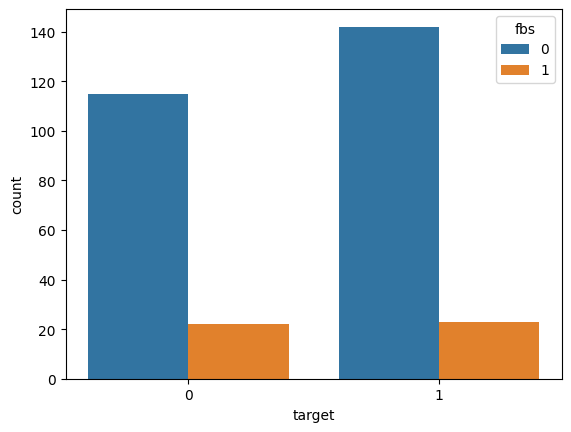

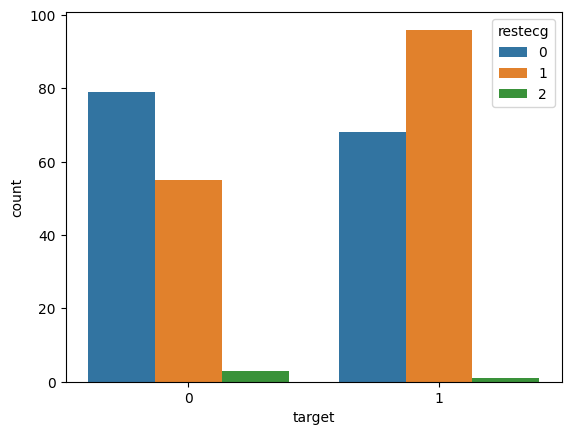

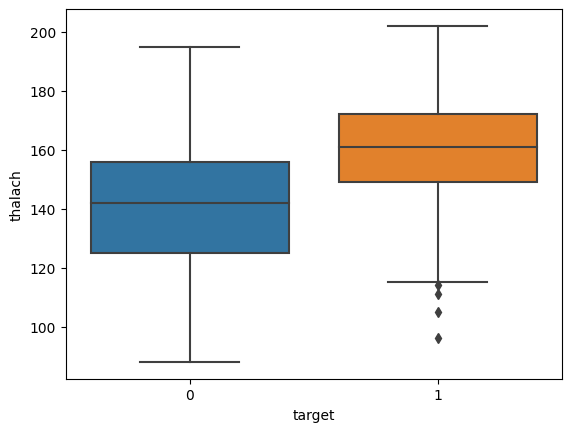

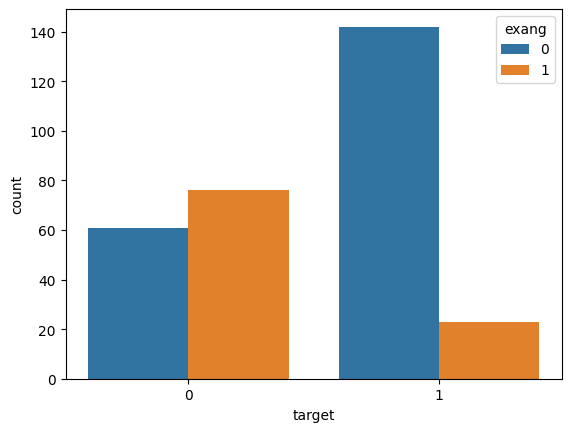

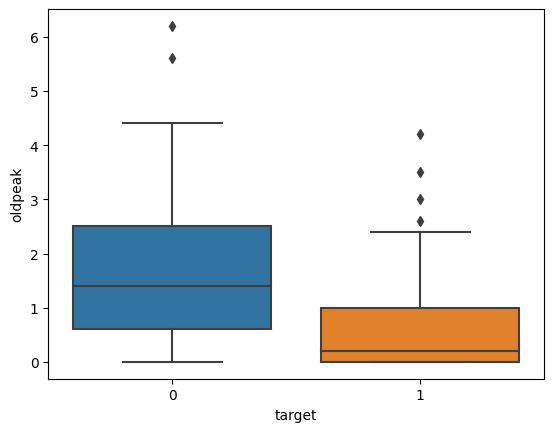

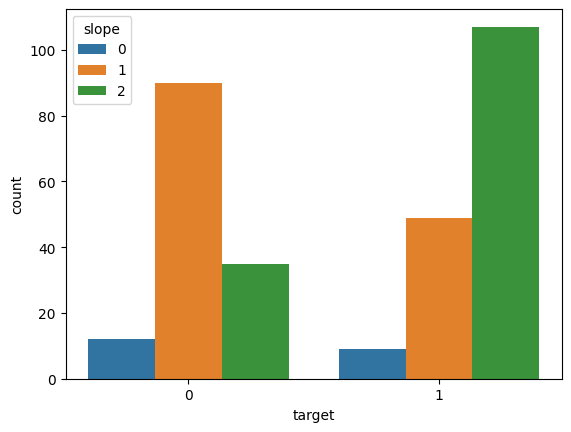

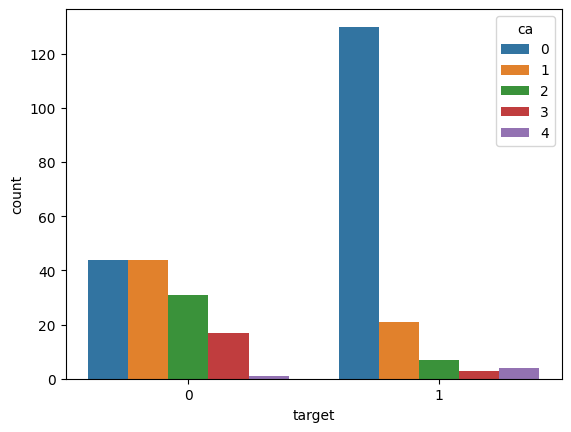

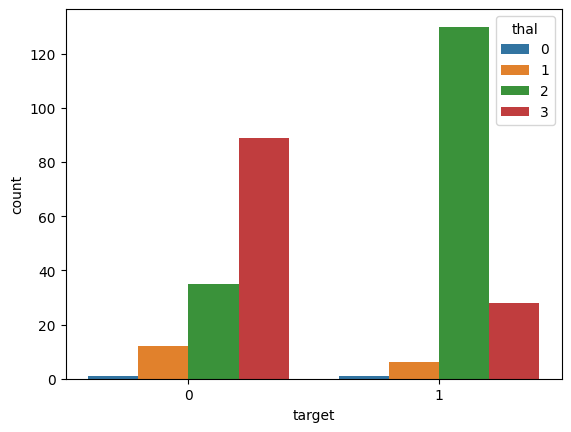

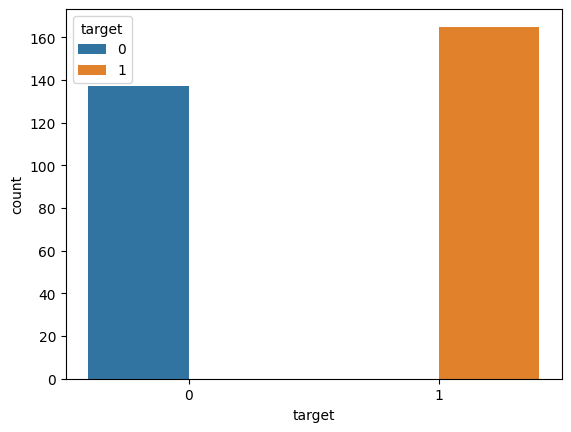

In [62]:
plot_cat('target')

In [63]:
drop_col

['trestbps', 'chol', 'fbs']

In [64]:
df = df.drop(drop_col,axis=1)

# Model Building,Feature scaling

In [65]:
X = df.drop('target',axis=1)
y = df['target']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
# classifier.fit(X_train, y_train)

In [69]:
X_train.shape

(226, 10)

In [70]:
# Penalty Type
penalty = ['l1','l2','None']

# Using logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

solver = ['lbfgs', 'liblinear']

In [71]:
from sklearn.model_selection import GridSearchCV
grid_model1 = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty,'solver':solver})

In [72]:
# X_train

In [73]:
grid_model1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'None'],
                         'solver': ['lbfgs', 'liblinear']})

In [74]:
grid_model1.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [75]:
y_pred = grid_model1.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[25  8]
 [ 5 38]]


0.8289473684210527

In [77]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.853932584269663

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.83      0.88      0.85        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



In [79]:
from sklearn import metrics
y_pred_proba = grid_model1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

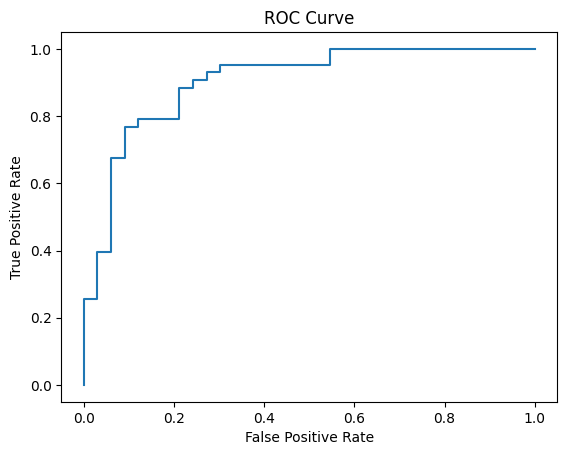

In [80]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

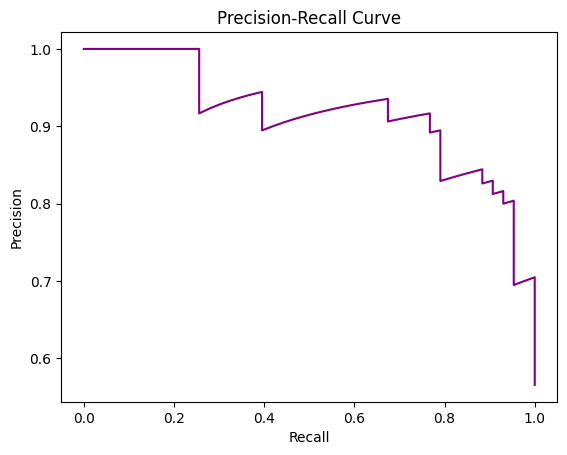

In [81]:
from sklearn.metrics import precision_recall_curve
y_score = grid_model1.predict_proba(X_test)[:, 1]

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [83]:
calc_vif(df.drop('target',axis = 1))

variables        VIF
0       age  23.478555
1       sex   3.404499
2        cp   2.367897
3   restecg   2.024032
4   thalach  30.107290
5     exang   1.978083
6   oldpeak   2.943690
7     slope   9.947933
8        ca   1.789225
9      thal  16.488429

In [84]:
calc_vif(df.drop(['target','thalach'],axis = 1))

variables        VIF
0       age  17.990563
1       sex   3.344923
2        cp   2.239950
3   restecg   2.000659
4     exang   1.953699
5   oldpeak   2.927817
6     slope   7.825727
7        ca   1.729711
8      thal  14.721738

In [85]:
calc_vif(df.drop(['target','thalach','thal'],axis = 1))

variables        VIF
0       age  12.767756
1       sex   3.090875
2        cp   2.239537
3   restecg   1.979670
4     exang   1.919129
5   oldpeak   2.815099
6     slope   7.431253
7        ca   1.729673

In [86]:
calc_vif(df.drop(['target','thalach','thal','slope'],axis = 1))

variables       VIF
0       age  6.445183
1       sex  2.969347
2        cp  2.222069
3   restecg  1.909378
4     exang  1.911070
5   oldpeak  2.093424
6        ca  1.729672

In [87]:
calc_vif(df.drop(['target','thalach','thal','slope','age'],axis = 1))

variables       VIF
0       sex  2.495805
1        cp  1.679044
2   restecg  1.658195
3     exang  1.737000
4   oldpeak  1.947956
5        ca  1.558560

In [88]:
df = df.drop(['thalach','thal','slope','age'],axis = 1)

In [89]:
X = df.drop('target',axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
# classifier.fit(X_train, y_train)

# Penalty Type
penalty = ['l1','l2','None']

# Using logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

solver = ['lbfgs', 'liblinear']

from sklearn.model_selection import GridSearchCV
grid_model2 = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty,'solver':solver})

In [90]:
grid_model2.fit(X_train,y_train)
grid_model2.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

{'C': 2.7825594022071245, 'penalty': 'l2', 'solver': 'lbfgs'}

In [91]:
y_pred = grid_model2.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[25  8]
 [ 5 38]]


0.8289473684210527

In [92]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.853932584269663

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.83      0.88      0.85        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



In [94]:
from sklearn import metrics
y_pred_proba = grid_model2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

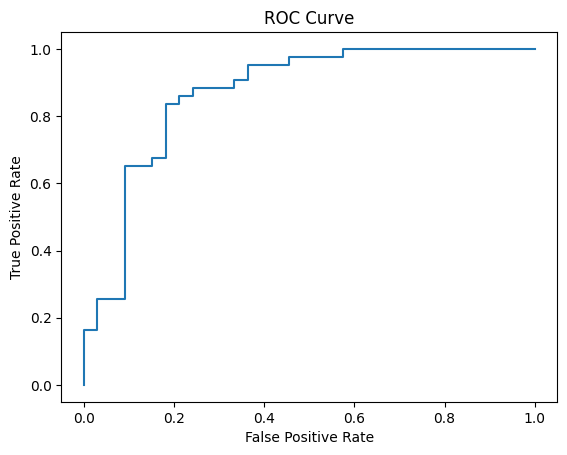

In [95]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

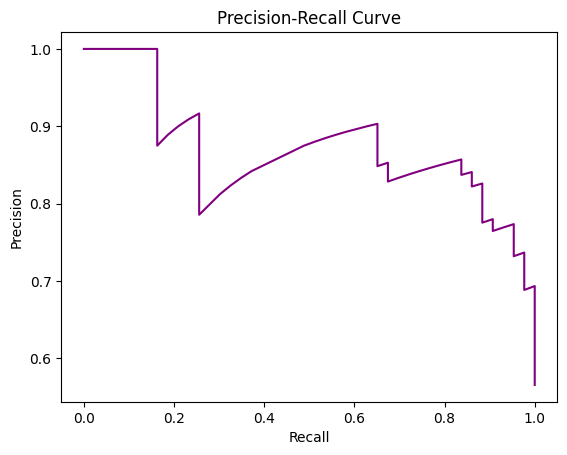

In [96]:
from sklearn.metrics import precision_recall_curve
y_score = grid_model2.predict_proba(X_test)[:, 1]

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

* We can see we get the same accuracy before and after removing features with high collinearity
* Our model has an accuracy of 82.89% and f1 score of 85.39 which is pretty good for the small number of observations we have

* As the data is small we will build a model without eliminating any features and compare the performances to chack if our judgement about eliminating certain features was good

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      302 non-null    int64  
 1   cp       302 non-null    int64  
 2   restecg  302 non-null    int64  
 3   exang    302 non-null    int64  
 4   oldpeak  302 non-null    float64
 5   ca       302 non-null    int64  
 6   target   302 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 18.9 KB


In [99]:
df = pd.read_csv('heart.csv')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: >

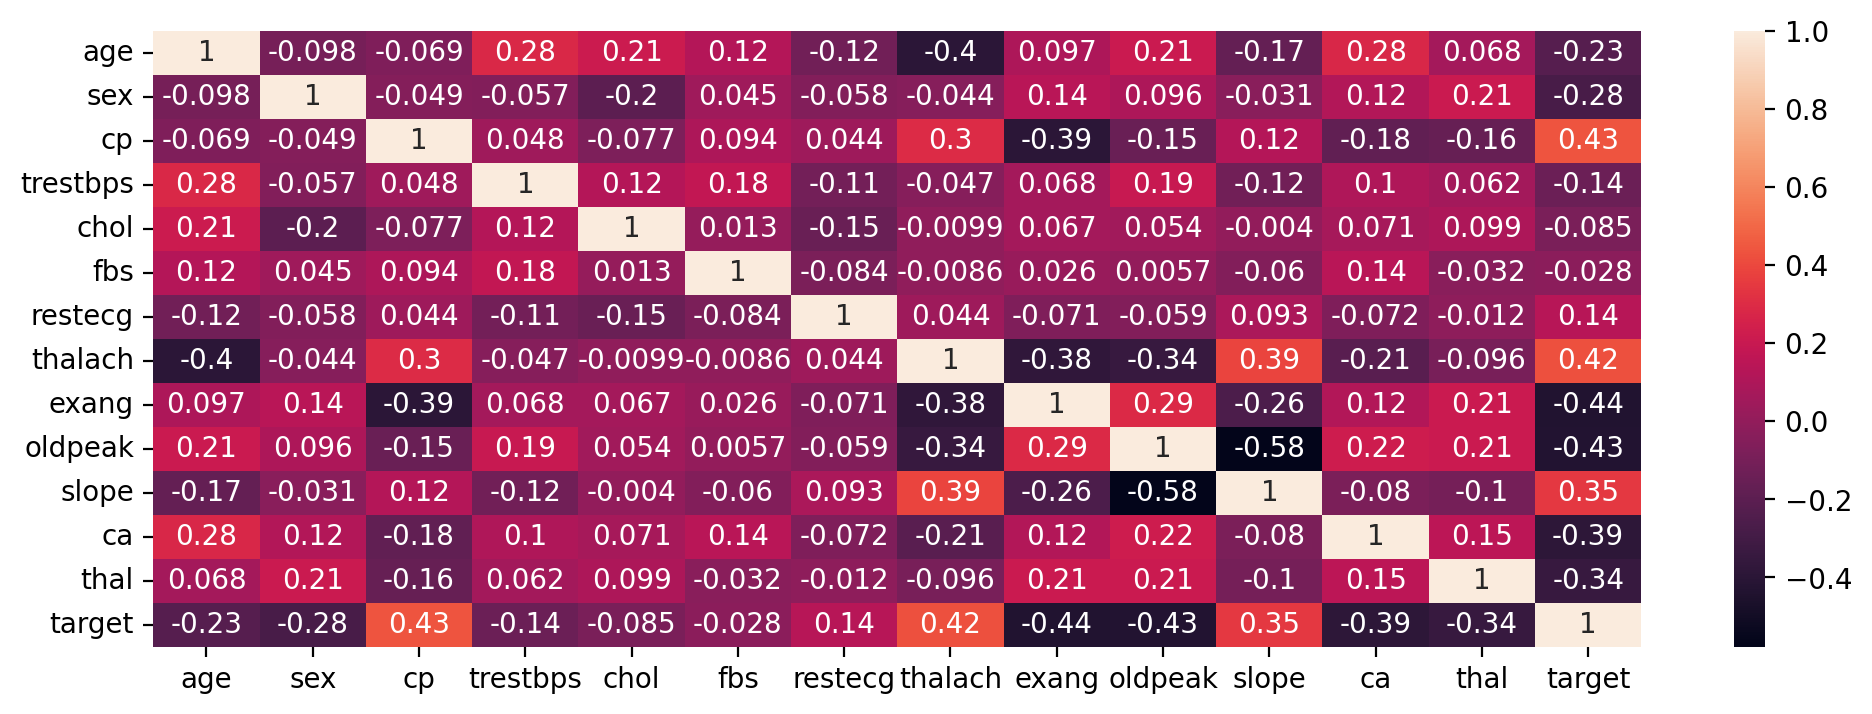

In [101]:
plt.figure(figsize=(12,4),dpi=200)
sns.heatmap(df.corr(),annot=True )

In [102]:
# help(sns.heatmap)

In [103]:
data = pd.read_csv('heart.csv')

In [104]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [105]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [106]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[24  9]
 [ 4 39]]


0.8289473684210527

In [108]:
from sklearn.metrics import recall_score,precision_score,f1_score
recall_score(y_test,y_pred)

0.9069767441860465

In [109]:
precision_score(y_test,y_pred)

0.8125

In [110]:
f1_score(y_test,y_pred)

0.8571428571428572

* We can see we are getting getting the same accuracy,f1 sore before and after eliminating 3 features
* As this is a small dataset the computation time was very fast for both the scenarios
* but if we had a data with a very large number of observations, This fetaure elimination would have helped us save a lot of time in building our model